In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import cufflinks as cf 
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
cfl=pd.read_csv('measurements.csv')


In [3]:
cfl['distance']=cfl['distance'].str.replace(',','.').astype(float)
cfl['consume']=cfl['consume'].str.replace(',','.').astype(float)
cfl['temp_inside']=cfl['temp_inside'].str.replace(',','.').astype(float)
cfl

distance  consume  speed  temp_inside  temp_outside specials gas_type  \
0        28.0      5.0     26         21.5            12      NaN      E10   
1        12.0      4.2     30         21.5            13      NaN      E10   
2        11.2      5.5     38         21.5            15      NaN      E10   
3        12.9      3.9     36         21.5            14      NaN      E10   
4        18.5      4.5     46         21.5            15      NaN      E10   
5         8.3      6.4     50         21.5            10      NaN      E10   
6         7.8      4.4     43         21.5            11      NaN      E10   
7        12.3      5.0     40         21.5             6      NaN      E10   
8         4.9      6.4     26         21.5             4      NaN      E10   
9        11.9      5.3     30         21.5             9      NaN      E10   
10       12.4      5.6     42         21.5             4      NaN      E10   
11       11.8      4.6     38         21.5             0      NaN      E10   
12       12.3      5.9     59         21.5            10      NaN      E10   
13       24.7      5.1     58         21.5            12      NaN      E10   
14       12.4      4.7     46         21.5            11      NaN      E10   
15       17.3      5.1     24         21.5             5      NaN      E10   
16       33.4      5.6     36         21.5             3      NaN      E10   
17       11.8      5.1     32         21.5             3      NaN      E10   
18       25.9      4.9     39         21.5             8      NaN      E10   
19       11.8      4.7     40         21.5             4      NaN      E10   
20       25.3      5.5     32         21.5             3      NaN      E10   
21       14.2      5.9     38         21.5             1      NaN      E10   
22       17.9      5.7     37         21.5             1      NaN      E10   
23       11.8      4.7     36         21.5             1      NaN      E10   
24       12.3      5.9     62         21.5             6      NaN      E10   
25       12.4      4.1     57         21.5             9      NaN      E10   
26       18.4      5.7     21         22.5             2      NaN      E10   
27       18.4      5.8     28         21.5             3      NaN      E10   
28       18.3      5.5     29         21.5             1      NaN      E10   
29       18.4      5.7     35         21.5             4      NaN      E10   
..        ...      ...    ...          ...           ...      ...      ...   
358       6.1      5.0     33         22.0            24      sun     SP98   
359      17.3      4.2     36         22.0            22      NaN     SP98   
360       6.0      4.8     27         22.0            17      NaN     SP98   
361      16.0      4.1     45         22.0            15      NaN     SP98   
362      15.4      4.9     55         22.0            18      NaN     SP98   
363      15.4      4.3     39         22.0            23      NaN     SP98   
364      16.0      3.9     35         22.0            18      NaN     SP98   
365      15.4      4.5     52         22.0            26      NaN     SP98   
366      16.6      4.1     48         25.5            30   sun ac     SP98   
367      15.4      5.0     48         25.5            31       ac     SP98   
368      16.0      4.0     43         22.0            21       ac     SP98   
369      15.4      4.5     42         22.0            30      NaN     SP98   
370      16.0      3.6     43         22.0            19      NaN     SP98   
371      20.9      4.1     33         22.0            21      NaN     SP98   
372      32.1      3.9     47         22.0            26      NaN     SP98   
373      15.3      6.6     16         24.0            27       ac     SP98   
374      28.5      4.0     44         25.0            23       ac     SP98   
375      11.9      3.7     33         25.0            19      NaN     SP98   
376      14.5      4.3     36         25.0            22      NaN     SP98   
377      16.6      4.1     

In [4]:
cfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      376 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null object
refill gas       13 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [5]:
cfl=cfl.drop(['specials','refill liters','refill gas'],axis=1)
cfl

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
0        28.0      5.0     26         21.5            12      E10   0     0   
1        12.0      4.2     30         21.5            13      E10   0     0   
2        11.2      5.5     38         21.5            15      E10   0     0   
3        12.9      3.9     36         21.5            14      E10   0     0   
4        18.5      4.5     46         21.5            15      E10   0     0   
5         8.3      6.4     50         21.5            10      E10   0     0   
6         7.8      4.4     43         21.5            11      E10   0     0   
7        12.3      5.0     40         21.5             6      E10   0     0   
8         4.9      6.4     26         21.5             4      E10   0     0   
9        11.9      5.3     30         21.5             9      E10   0     0   
10       12.4      5.6     42         21.5             4      E10   0     0   
11       11.8      4.6     38         21.5             0      E10   0     0   
12       12.3      5.9     59         21.5            10      E10   0     0   
13       24.7      5.1     58         21.5            12      E10   0     0   
14       12.4      4.7     46         21.5            11      E10   0     0   
15       17.3      5.1     24         21.5             5      E10   0     0   
16       33.4      5.6     36         21.5             3      E10   0     0   
17       11.8      5.1     32         21.5             3      E10   0     0   
18       25.9      4.9     39         21.5             8      E10   0     0   
19       11.8      4.7     40         21.5             4      E10   0     0   
20       25.3      5.5     32         21.5             3      E10   0     0   
21       14.2      5.9     38         21.5             1      E10   0     0   
22       17.9      5.7     37         21.5             1      E10   0     0   
23       11.8      4.7     36         21.5             1      E10   0     0   
24       12.3      5.9     62         21.5             6      E10   0     0   
25       12.4      4.1     57         21.5             9      E10   0     0   
26       18.4      5.7     21         22.5             2      E10   0     0   
27       18.4      5.8     28         21.5             3      E10   0     0   
28       18.3      5.5     29         21.5             1      E10   0     0   
29       18.4      5.7     35         21.5             4      E10   0     0   
..        ...      ...    ...          ...           ...      ...  ..   ...   
358       6.1      5.0     33         22.0            24     SP98   0     0   
359      17.3      4.2     36         22.0            22     SP98   0     0   
360       6.0      4.8     27         22.0            17     SP98   0     0   
361      16.0      4.1     45         22.0            15     SP98   0     0   
362      15.4      4.9     55         22.0            18     SP98   0     0   
363      15.4      4.3     39         22.0            23     SP98   0     0   
364      16.0      3.9     35         22.0            18     SP98   0     0   
365      15.4      4.5     52         22.0            26     SP98   0     0   
366      16.6      4.1     48         25.5            30     SP98   1     0   
367      15.4      5.0     48         25.5            31     SP98   1     0   
368      16.0      4.0     43         22.0            21     SP98   1     0   
369      15.4      4.5     42         22.0            30     SP98   0     0   
370      16.0      3.6     43         22.0            19     SP98   0     0   
371      20.9      4.1     33         22.0            21     SP98   0     0   
372      32.1      3.9     47         22.0            26     SP98   0     0   
373      15.3      6.6     16         24.0            27     SP98   1     0   
374      28.5      4.0     44         25.0            23     SP98   1     0   
375      11.9      3.7     33         25.0            19     SP98   0     0   
376      14.5      4.3     36         25.0            2

In [6]:
cfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
distance        388 non-null float64
consume         388 non-null float64
speed           388 non-null int64
temp_inside     376 non-null float64
temp_outside    388 non-null int64
gas_type        388 non-null object
AC              388 non-null int64
rain            388 non-null int64
sun             388 non-null int64
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [7]:
cfl['temp_inside']=cfl['temp_inside'].fillna(16.0)


In [8]:
cfl.describe()

distance     consume       speed  temp_inside  temp_outside  \
count  388.000000  388.000000  388.000000   388.000000    388.000000   
mean    19.652835    4.912371   41.927835    21.746134     11.358247   
std     22.667837    1.033172   13.598524     1.430332      6.991542   
min      1.300000    3.300000   14.000000    16.000000     -5.000000   
25%     11.800000    4.300000   32.750000    21.500000      7.000000   
50%     14.600000    4.700000   40.500000    22.000000     10.000000   
75%     19.000000    5.300000   50.000000    22.500000     16.000000   
max    216.100000   12.200000   90.000000    25.500000     31.000000   

               AC        rain         sun  
count  388.000000  388.000000  388.000000  
mean     0.077320    0.123711    0.082474  
std      0.267443    0.329677    0.275441  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000

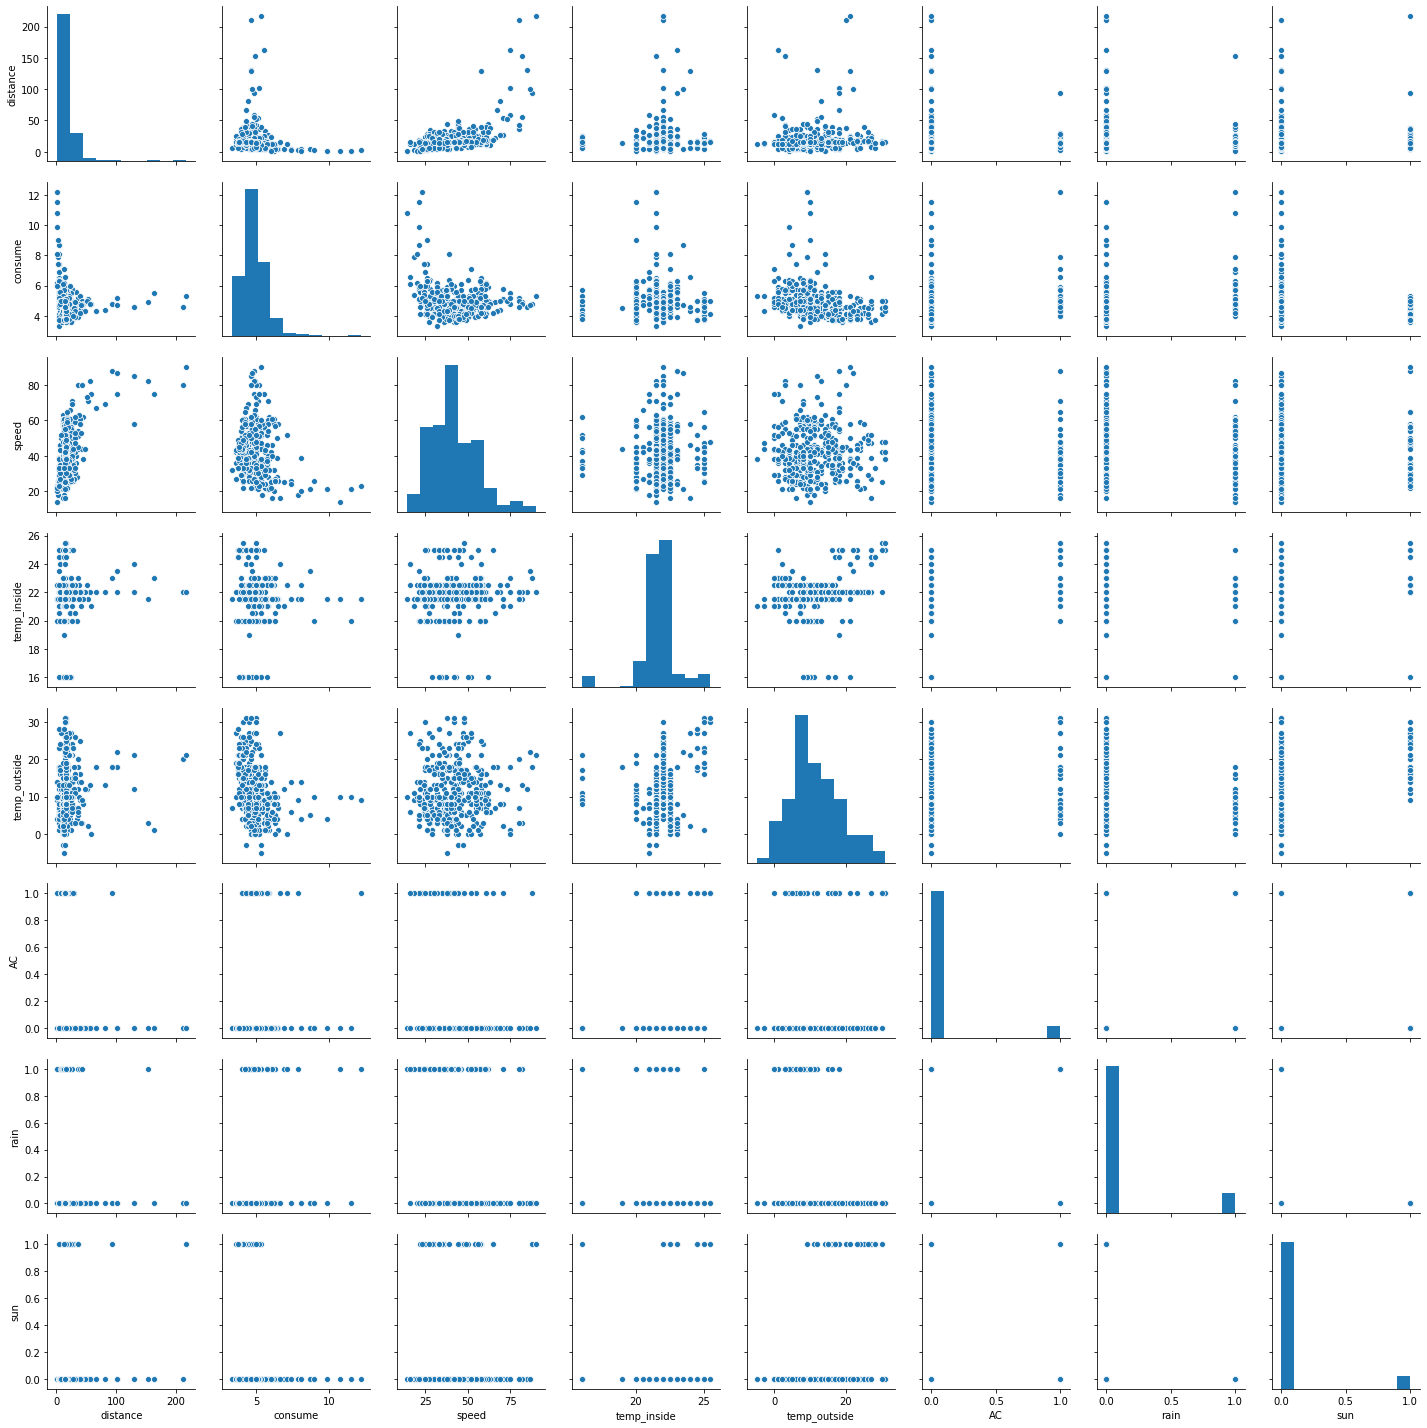

In [9]:
sns.pairplot(cfl)
plt.show()

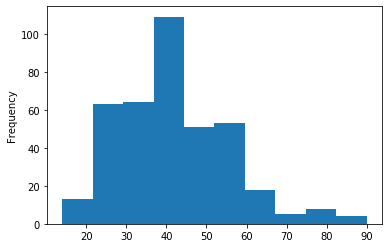

In [10]:
cfl['speed'].plot.hist()
plt.show()

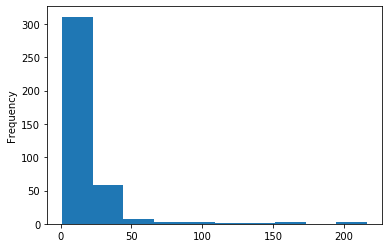

In [11]:
cfl['distance'].plot.hist()
plt.show()

## Fuel consumption acc to  AC 

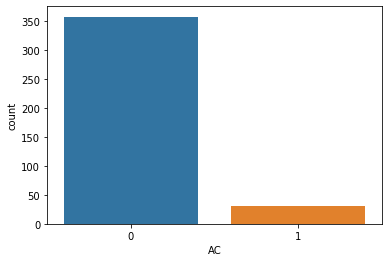

In [12]:
sns.countplot(cfl['AC'])
plt.show()

## Fuel consumption acc to maximum distance travel

In [13]:
maxd=cfl.query('distance==216.100000')
maxd

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
319     216.1      5.3     90         22.0            21     SP98   0     0   

     sun  
319    1

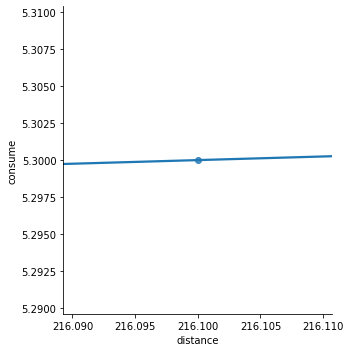

In [14]:
sns.lmplot('distance','consume',data=maxd)
plt.show()

## Fuel consumption acc to minimum distance travel

In [15]:
mind=cfl.query('distance==1.300000')
mind

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
210       1.3     11.5     21         20.0            10     SP98   0     0   

     sun  
210    0

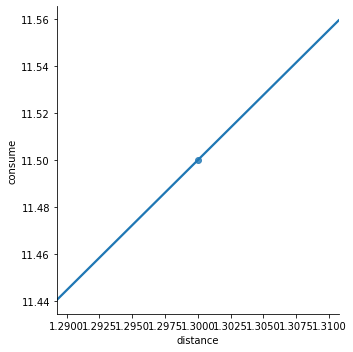

In [16]:
sns.lmplot('distance','consume',data=mind)
plt.show()

## Fuel Consumption acc to maximum speed

In [17]:
maxs=cfl.query('speed==90.000000')
maxs

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
319     216.1      5.3     90         22.0            21     SP98   0     0   

     sun  
319    1

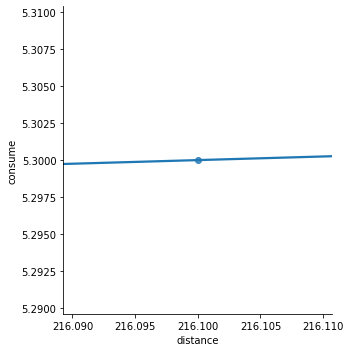

In [18]:
sns.lmplot('distance','consume',data=maxs)
plt.show()

## Fuel consumption acc to minimum speed

In [19]:
mins=cfl.query('speed==14.000000')
mins

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
147       1.7     10.8     14         21.5            10      E10   0     1   

     sun  
147    0

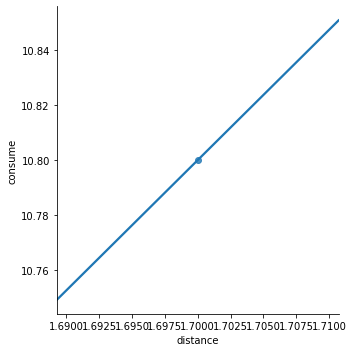

In [20]:
sns.lmplot('distance','consume',data=mins)
plt.show()

## Minimum fuel consumption in rainy days

In [21]:
minr=cfl.query('rain==0.000000')
minr

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
0        28.0      5.0     26         21.5            12      E10   0     0   
1        12.0      4.2     30         21.5            13      E10   0     0   
2        11.2      5.5     38         21.5            15      E10   0     0   
3        12.9      3.9     36         21.5            14      E10   0     0   
4        18.5      4.5     46         21.5            15      E10   0     0   
5         8.3      6.4     50         21.5            10      E10   0     0   
6         7.8      4.4     43         21.5            11      E10   0     0   
7        12.3      5.0     40         21.5             6      E10   0     0   
8         4.9      6.4     26         21.5             4      E10   0     0   
9        11.9      5.3     30         21.5             9      E10   0     0   
10       12.4      5.6     42         21.5             4      E10   0     0   
11       11.8      4.6     38         21.5             0      E10   0     0   
12       12.3      5.9     59         21.5            10      E10   0     0   
13       24.7      5.1     58         21.5            12      E10   0     0   
14       12.4      4.7     46         21.5            11      E10   0     0   
15       17.3      5.1     24         21.5             5      E10   0     0   
16       33.4      5.6     36         21.5             3      E10   0     0   
17       11.8      5.1     32         21.5             3      E10   0     0   
18       25.9      4.9     39         21.5             8      E10   0     0   
19       11.8      4.7     40         21.5             4      E10   0     0   
20       25.3      5.5     32         21.5             3      E10   0     0   
21       14.2      5.9     38         21.5             1      E10   0     0   
22       17.9      5.7     37         21.5             1      E10   0     0   
23       11.8      4.7     36         21.5             1      E10   0     0   
24       12.3      5.9     62         21.5             6      E10   0     0   
25       12.4      4.1     57         21.5             9      E10   0     0   
26       18.4      5.7     21         22.5             2      E10   0     0   
27       18.4      5.8     28         21.5             3      E10   0     0   
28       18.3      5.5     29         21.5             1      E10   0     0   
29       18.4      5.7     35         21.5             4      E10   0     0   
..        ...      ...    ...          ...           ...      ...  ..   ...   
358       6.1      5.0     33         22.0            24     SP98   0     0   
359      17.3      4.2     36         22.0            22     SP98   0     0   
360       6.0      4.8     27         22.0            17     SP98   0     0   
361      16.0      4.1     45         22.0            15     SP98   0     0   
362      15.4      4.9     55         22.0            18     SP98   0     0   
363      15.4      4.3     39         22.0            23     SP98   0     0   
364      16.0      3.9     35         22.0            18     SP98   0     0   
365      15.4      4.5     52         22.0            26     SP98   0     0   
366      16.6      4.1     48         25.5            30     SP98   1     0   
367      15.4      5.0     48         25.5            31     SP98   1     0   
368      16.0      4.0     43         22.0            21     SP98   1     0   
369      15.4      4.5     42         22.0            30     SP98   0     0   
370      16.0      3.6     43         22.0            19     SP98   0     0   
371      20.9      4.1     33         22.0            21     SP98   0     0   
372      32.1      3.9     47         22.0            26     SP98   0     0   
373      15.3      6.6     16         24.0            27     SP98   1     0   
374      28.5      4.0     44         25.0            23     SP98   1     0   
375      11.9      3.7     33         25.0            19     SP98   0     0   
376      14.5      4.3     36         25.0            2

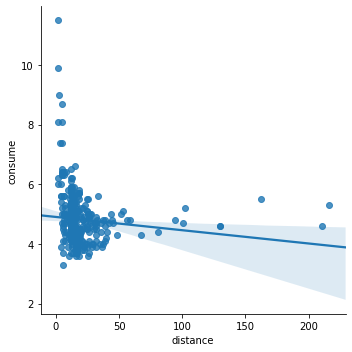

In [22]:
sns.lmplot('distance','consume',data=minr)
plt.show()

## Maximum fuel consumption in rainy days

In [23]:
maxr=cfl.query('rain==1.000000')
maxr

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
40       12.4      4.0     55         21.5             7      E10   1     1   
50       11.8      5.1     29         21.5             5     SP98   0     1   
53       13.1      6.1     46         21.5             6     SP98   0     1   
55      153.5      4.9     82         21.5             3     SP98   0     1   
59       12.3      5.7     52         21.5             8     SP98   0     1   
60        2.9      7.9     18         21.5             9     SP98   1     1   
61        2.1     12.2     23         21.5             9     SP98   1     1   
85       12.3      6.2     58         20.0            11     SP98   0     1   
86       13.2      4.3     51         20.0            11     SP98   0     1   
87       13.0      5.0     45         20.0            11     SP98   0     1   
94       11.8      5.9     21         20.0             9     SP98   1     1   
101      26.2      5.8     71         21.0             8     SP98   1     1   
102      18.8      5.0     62         16.0             9     SP98   0     1   
103       4.9      6.9     25         21.0            12     SP98   0     1   
104      12.4      5.4     18         21.0            11     SP98   1     1   
116      11.8      5.1     26         23.0             4     SP98   0     1   
117      22.9      6.0     42         23.0             4     SP98   0     1   
118      12.4      4.6     38         23.0             1     SP98   0     1   
124      11.8      4.6     38         23.0             0     SP98   0     1   
125      12.2      6.3     57         23.0             0     SP98   0     1   
136      23.5      6.0     25         21.5             5     SP98   0     1   
137      11.8      4.5     38         21.5             5     SP98   0     1   
138      12.3      6.1     61         21.5            10     SP98   0     1   
139      16.1      5.4     24         21.5             7      E10   0     1   
140      11.8      4.3     40         21.5            10      E10   0     1   
147       1.7     10.8     14         21.5            10      E10   0     1   
152      22.9      4.6     61         21.5             7      E10   0     1   
153      17.3      5.0     61         21.5             6      E10   1     1   
155      36.6      5.2     80         21.5             7      E10   0     1   
157      11.8      4.2     34         21.5             9      E10   0     1   
158      21.6      5.3     44         21.5             9      E10   0     1   
159      39.4      5.3     60         21.5             9      E10   0     1   
181      12.3      7.1     52         22.5             0      E10   1     1   
191      43.7      4.7     44         22.0             9     SP98   0     1   
204       8.7      5.3     28         22.5            12     SP98   1     1   
224      12.9      5.1     34         22.5             8     SP98   0     1   
227      19.0      5.1     53         22.5             4     SP98   0     1   
228      13.0      5.7     38         22.5             3     SP98   1     1   
242       9.2      5.7     33         22.5             8      E10   0     1   
243      12.3      5.8     54         22.5            10      E10   0     1   
245      11.8      6.1     16         22.5             6      E10   0     1   
246      13.0      5.7     37         22.5            11      E10   0     1   
274      25.7      4.9     50         22.0            10     SP98   0     1   
277      16.0      4.4     40         22.0             7     SP98   1     1   
305      21.1      5.1     33         22.0            10     SP98   0     1   
321      16.6      4.2     52         22.0            15     SP98   0     1   
344      16.1      5.1     30         25.0            16      E10   1     1   
350      16.1      4.8     36         22.0            18     SP98   0     1   

     sun  
40     0  
50     0  
53     0  
55     0  
59     0  
60     0  
61     0  
85     0  
86     0  
87     0  
94     0  
1

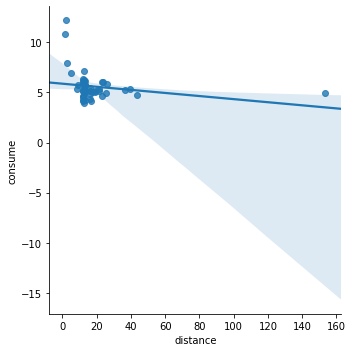

In [24]:
sns.lmplot('distance','consume',data=maxr)
plt.show()

##  Minimum fuel Consumption in sunny days

In [25]:
minsn=cfl.query('sun==0.000000')
minsn

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
0        28.0      5.0     26         21.5            12      E10   0     0   
1        12.0      4.2     30         21.5            13      E10   0     0   
2        11.2      5.5     38         21.5            15      E10   0     0   
3        12.9      3.9     36         21.5            14      E10   0     0   
4        18.5      4.5     46         21.5            15      E10   0     0   
5         8.3      6.4     50         21.5            10      E10   0     0   
6         7.8      4.4     43         21.5            11      E10   0     0   
7        12.3      5.0     40         21.5             6      E10   0     0   
8         4.9      6.4     26         21.5             4      E10   0     0   
9        11.9      5.3     30         21.5             9      E10   0     0   
10       12.4      5.6     42         21.5             4      E10   0     0   
11       11.8      4.6     38         21.5             0      E10   0     0   
12       12.3      5.9     59         21.5            10      E10   0     0   
13       24.7      5.1     58         21.5            12      E10   0     0   
14       12.4      4.7     46         21.5            11      E10   0     0   
15       17.3      5.1     24         21.5             5      E10   0     0   
16       33.4      5.6     36         21.5             3      E10   0     0   
17       11.8      5.1     32         21.5             3      E10   0     0   
18       25.9      4.9     39         21.5             8      E10   0     0   
19       11.8      4.7     40         21.5             4      E10   0     0   
20       25.3      5.5     32         21.5             3      E10   0     0   
21       14.2      5.9     38         21.5             1      E10   0     0   
22       17.9      5.7     37         21.5             1      E10   0     0   
23       11.8      4.7     36         21.5             1      E10   0     0   
24       12.3      5.9     62         21.5             6      E10   0     0   
25       12.4      4.1     57         21.5             9      E10   0     0   
26       18.4      5.7     21         22.5             2      E10   0     0   
27       18.4      5.8     28         21.5             3      E10   0     0   
28       18.3      5.5     29         21.5             1      E10   0     0   
29       18.4      5.7     35         21.5             4      E10   0     0   
..        ...      ...    ...          ...           ...      ...  ..   ...   
351      16.0      4.1     46         22.0            17     SP98   0     0   
352      16.3      4.0     35         22.0            23     SP98   0     0   
353      16.0      3.7     44         22.0            16     SP98   0     0   
354      18.3      4.3     46         22.0            23     SP98   0     0   
356      17.0      4.2     48         22.0            16     SP98   0     0   
357       6.1      5.0     35         24.5            18     SP98   0     0   
359      17.3      4.2     36         22.0            22     SP98   0     0   
360       6.0      4.8     27         22.0            17     SP98   0     0   
361      16.0      4.1     45         22.0            15     SP98   0     0   
362      15.4      4.9     55         22.0            18     SP98   0     0   
363      15.4      4.3     39         22.0            23     SP98   0     0   
364      16.0      3.9     35         22.0            18     SP98   0     0   
365      15.4      4.5     52         22.0            26     SP98   0     0   
367      15.4      5.0     48         25.5            31     SP98   1     0   
368      16.0      4.0     43         22.0            21     SP98   1     0   
369      15.4      4.5     42         22.0            30     SP98   0     0   
370      16.0      3.6     43         22.0            19     SP98   0     0   
371      20.9      4.1     33         22.0            21     SP98   0     0   
372      32.1      3.9     47         22.0            2

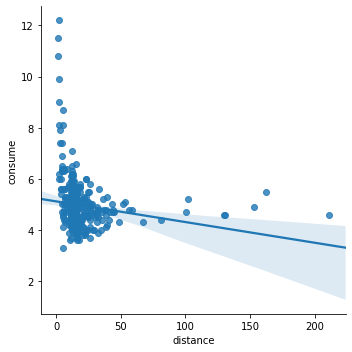

In [26]:
sns.lmplot('distance','consume',data=minsn)
plt.show()

## Maximum fuel consumption in sunny days

In [27]:
minsn=cfl.query('sun==1.000000')
minsn

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
219      19.0      4.4     58         22.5            17     SP98   0     0   
239      16.9      4.5     48         22.5             9      E10   0     0   
240      12.4      4.6     55         22.5            11      E10   0     0   
241      17.4      4.4     36         22.5            12      E10   0     0   
248      12.3      5.2     57         22.5            15      E10   0     0   
249      12.5      4.3     57         22.5            16      E10   0     0   
250      31.5      4.1     30         22.5            16      E10   0     0   
253      17.0      3.9     46         22.5            14      E10   0     0   
257      12.4      4.7     55         22.5            14      E10   0     0   
261      24.5      3.9     50         16.0            15      E10   0     0   
265       4.2      3.9     29         22.0            18      E10   0     0   
273      93.9      4.8     88         23.0            18      E10   1     0   
286      37.2      4.0     45         22.0            20     SP98   0     0   
287      28.8      3.9     35         22.0            15     SP98   0     0   
289       7.4      4.1     25         22.0            18     SP98   0     0   
290      17.3      4.1     22         22.0            25     SP98   0     0   
295      12.7      4.5     39         22.0            27     SP98   0     0   
299      18.7      4.2     65         25.0            18     SP98   1     0   
300      36.5      3.9     54         23.0            18     SP98   0     0   
301      19.0      5.0     35         22.0            15     SP98   1     0   
311      10.8      4.7     48         22.0            17     SP98   0     0   
312      19.8      4.0     56         22.0            17     SP98   0     0   
319     216.1      5.3     90         22.0            21     SP98   0     0   
320      25.5      3.6     27         22.0            27     SP98   0     0   
331      21.5      4.8     47         25.0            27      E10   1     0   
355       4.5      5.2     23         22.0            23     SP98   0     0   
358       6.1      5.0     33         22.0            24     SP98   0     0   
366      16.6      4.1     48         25.5            30     SP98   1     0   
377      16.6      4.1     49         22.0            26     SP98   0     0   
379      16.7      3.8     44         24.5            23     SP98   0     0   
381       5.5      3.7     33         24.5            28     SP98   0     0   
382      13.6      3.7     33         24.5            28     SP98   0     0   

     sun  
219    1  
239    1  
240    1  
241    1  
248    1  
249    1  
250    1  
253    1  
257    1  
261    1  
265    1  
273    1  
286    1  
287    1  
289    1  
290    1  
295    1  
299    1  
300    1  
301    1  
311    1  
312    1  
319    1  
320    1  
331    1  
355    1  
358    1  
366    1  
377    1  
379    1  
381    1  
382    1

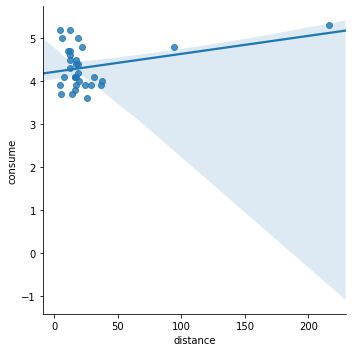

In [28]:
sns.lmplot('distance','consume',data=minsn)
plt.show()

## Minumum fuel consume with AC

In [29]:
minac=cfl.query('AC==0.000000')
minac

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
0        28.0      5.0     26         21.5            12      E10   0     0   
1        12.0      4.2     30         21.5            13      E10   0     0   
2        11.2      5.5     38         21.5            15      E10   0     0   
3        12.9      3.9     36         21.5            14      E10   0     0   
4        18.5      4.5     46         21.5            15      E10   0     0   
5         8.3      6.4     50         21.5            10      E10   0     0   
6         7.8      4.4     43         21.5            11      E10   0     0   
7        12.3      5.0     40         21.5             6      E10   0     0   
8         4.9      6.4     26         21.5             4      E10   0     0   
9        11.9      5.3     30         21.5             9      E10   0     0   
10       12.4      5.6     42         21.5             4      E10   0     0   
11       11.8      4.6     38         21.5             0      E10   0     0   
12       12.3      5.9     59         21.5            10      E10   0     0   
13       24.7      5.1     58         21.5            12      E10   0     0   
14       12.4      4.7     46         21.5            11      E10   0     0   
15       17.3      5.1     24         21.5             5      E10   0     0   
16       33.4      5.6     36         21.5             3      E10   0     0   
17       11.8      5.1     32         21.5             3      E10   0     0   
18       25.9      4.9     39         21.5             8      E10   0     0   
19       11.8      4.7     40         21.5             4      E10   0     0   
20       25.3      5.5     32         21.5             3      E10   0     0   
21       14.2      5.9     38         21.5             1      E10   0     0   
22       17.9      5.7     37         21.5             1      E10   0     0   
23       11.8      4.7     36         21.5             1      E10   0     0   
24       12.3      5.9     62         21.5             6      E10   0     0   
25       12.4      4.1     57         21.5             9      E10   0     0   
26       18.4      5.7     21         22.5             2      E10   0     0   
27       18.4      5.8     28         21.5             3      E10   0     0   
28       18.3      5.5     29         21.5             1      E10   0     0   
29       18.4      5.7     35         21.5             4      E10   0     0   
..        ...      ...    ...          ...           ...      ...  ..   ...   
349      18.3      4.3     46         22.0            16     SP98   0     0   
350      16.1      4.8     36         22.0            18     SP98   0     1   
351      16.0      4.1     46         22.0            17     SP98   0     0   
352      16.3      4.0     35         22.0            23     SP98   0     0   
353      16.0      3.7     44         22.0            16     SP98   0     0   
354      18.3      4.3     46         22.0            23     SP98   0     0   
355       4.5      5.2     23         22.0            23     SP98   0     0   
356      17.0      4.2     48         22.0            16     SP98   0     0   
357       6.1      5.0     35         24.5            18     SP98   0     0   
358       6.1      5.0     33         22.0            24     SP98   0     0   
359      17.3      4.2     36         22.0            22     SP98   0     0   
360       6.0      4.8     27         22.0            17     SP98   0     0   
361      16.0      4.1     45         22.0            15     SP98   0     0   
362      15.4      4.9     55         22.0            18     SP98   0     0   
363      15.4      4.3     39         22.0            23     SP98   0     0   
364      16.0      3.9     35         22.0            18     SP98   0     0   
365      15.4      4.5     52         22.0            26     SP98   0     0   
369      15.4      4.5     42         22.0            30     SP98   0     0   
370      16.0      3.6     43         22.0            1

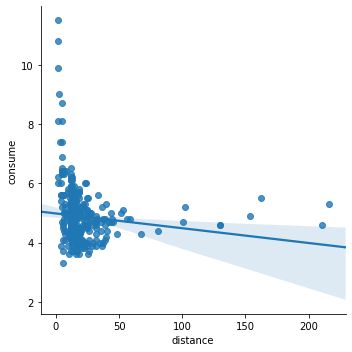

In [30]:
sns.lmplot('distance','consume',data=minac)
plt.show()

## Maximum fuel consumption with AC

In [31]:
maxac=cfl.query('AC==1.000000')
maxac

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
40       12.4      4.0     55         21.5             7      E10   1     1   
41        4.5      5.0     29         21.5             7      E10   1     0   
60        2.9      7.9     18         21.5             9     SP98   1     1   
61        2.1     12.2     23         21.5             9     SP98   1     1   
69       11.8      4.5     37         21.5             4     SP98   1     0   
94       11.8      5.9     21         20.0             9     SP98   1     1   
101      26.2      5.8     71         21.0             8     SP98   1     1   
104      12.4      5.4     18         21.0            11     SP98   1     1   
153      17.3      5.0     61         21.5             6      E10   1     1   
181      12.3      7.1     52         22.5             0      E10   1     1   
204       8.7      5.3     28         22.5            12     SP98   1     1   
205       7.9      4.7     31         22.5            12     SP98   1     0   
228      13.0      5.7     38         22.5             3     SP98   1     1   
273      93.9      4.8     88         23.0            18      E10   1     0   
277      16.0      4.4     40         22.0             7     SP98   1     1   
299      18.7      4.2     65         25.0            18     SP98   1     0   
301      19.0      5.0     35         22.0            15     SP98   1     0   
302      16.6      4.4     46         22.0             5     SP98   1     0   
303      29.9      4.5     32         22.0            18     SP98   1     0   
331      21.5      4.8     47         25.0            27      E10   1     0   
344      16.1      5.1     30         25.0            16      E10   1     1   
366      16.6      4.1     48         25.5            30     SP98   1     0   
367      15.4      5.0     48         25.5            31     SP98   1     0   
368      16.0      4.0     43         22.0            21     SP98   1     0   
373      15.3      6.6     16         24.0            27     SP98   1     0   
374      28.5      4.0     44         25.0            23     SP98   1     0   
378      16.2      4.4     39         24.5            17     SP98   1     0   
384      16.1      4.3     38         25.0            31     SP98   1     0   
386      15.4      4.6     42         25.0            31     SP98   1     0   
387      14.7      5.0     25         25.0            30     SP98   1     0   

     sun  
40     0  
41     0  
60     0  
61     0  
69     0  
94     0  
101    0  
104    0  
153    0  
181    0  
204    0  
205    0  
228    0  
273    1  
277    0  
299    1  
301    1  
302    0  
303    0  
331    1  
344    0  
366    1  
367    0  
368    0  
373    0  
374    0  
378    0  
384    0  
386    0  
387    0

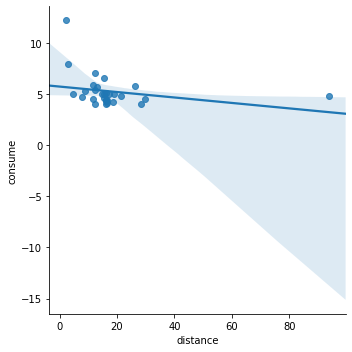

In [32]:
sns.lmplot('distance','consume',data=maxac)
plt.show()

## The different gas type used by the user

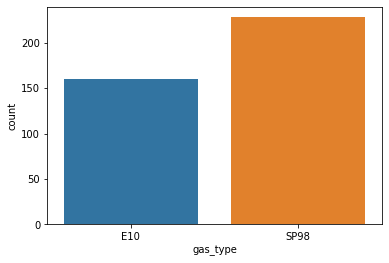

In [33]:
sns.countplot(cfl['gas_type'])
plt.show()

In [34]:
gas1=cfl[cfl['gas_type']=='E10']
gas1

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
0        28.0      5.0     26         21.5            12      E10   0     0   
1        12.0      4.2     30         21.5            13      E10   0     0   
2        11.2      5.5     38         21.5            15      E10   0     0   
3        12.9      3.9     36         21.5            14      E10   0     0   
4        18.5      4.5     46         21.5            15      E10   0     0   
5         8.3      6.4     50         21.5            10      E10   0     0   
6         7.8      4.4     43         21.5            11      E10   0     0   
7        12.3      5.0     40         21.5             6      E10   0     0   
8         4.9      6.4     26         21.5             4      E10   0     0   
9        11.9      5.3     30         21.5             9      E10   0     0   
10       12.4      5.6     42         21.5             4      E10   0     0   
11       11.8      4.6     38         21.5             0      E10   0     0   
12       12.3      5.9     59         21.5            10      E10   0     0   
13       24.7      5.1     58         21.5            12      E10   0     0   
14       12.4      4.7     46         21.5            11      E10   0     0   
15       17.3      5.1     24         21.5             5      E10   0     0   
16       33.4      5.6     36         21.5             3      E10   0     0   
17       11.8      5.1     32         21.5             3      E10   0     0   
18       25.9      4.9     39         21.5             8      E10   0     0   
19       11.8      4.7     40         21.5             4      E10   0     0   
20       25.3      5.5     32         21.5             3      E10   0     0   
21       14.2      5.9     38         21.5             1      E10   0     0   
22       17.9      5.7     37         21.5             1      E10   0     0   
23       11.8      4.7     36         21.5             1      E10   0     0   
24       12.3      5.9     62         21.5             6      E10   0     0   
25       12.4      4.1     57         21.5             9      E10   0     0   
26       18.4      5.7     21         22.5             2      E10   0     0   
27       18.4      5.8     28         21.5             3      E10   0     0   
28       18.3      5.5     29         21.5             1      E10   0     0   
29       18.4      5.7     35         21.5             4      E10   0     0   
..        ...      ...    ...          ...           ...      ...  ..   ...   
268      16.0      3.8     42         16.0             8      E10   0     0   
269      15.4      4.5     50         22.0            14      E10   0     0   
270      16.0      3.8     41         22.0            12      E10   0     0   
271       4.2      5.6     32         22.0            18      E10   0     0   
272     101.9      5.2     75         22.0            18      E10   0     0   
273      93.9      4.8     88         23.0            18      E10   1     0   
325      16.6      3.7     49         22.0            17      E10   0     0   
326      15.4      4.5     43         22.0            24      E10   0     0   
327      16.5      3.9     43         22.0            17      E10   0     0   
328      15.4      5.1     21         22.0            24      E10   0     0   
329      18.4      4.2     59         22.0            24      E10   0     0   
330      39.5      4.2     58         22.0            25      E10   0     0   
331      21.5      4.8     47         25.0            27      E10   1     0   
332       4.8      4.7     26         25.0            18      E10   0     0   
333     100.9      4.7     87         23.5            22      E10   0     0   
334     129.7      4.6     58         24.0            21      E10   0     0   
335      16.6      3.8     43         21.5            16      E10   0     0   
336      15.4      4.2     50         21.5            21      E10   0     0   
337      16.0      3.7     45         22.0            1

In [35]:
gas1.describe()

distance     consume       speed  temp_inside  temp_outside  \
count  160.000000  160.000000  160.000000   160.000000    160.000000   
mean    21.096250    4.931250   43.506250    21.806250     10.118750   
std     20.307234    0.900956   14.077949     1.037031      6.392185   
min      1.700000    3.700000   14.000000    16.000000     -5.000000   
25%     12.075000    4.400000   35.000000    21.500000      6.000000   
50%     15.400000    4.800000   42.000000    21.500000      9.000000   
75%     21.200000    5.300000   51.000000    22.500000     14.250000   
max    130.300000   10.800000   88.000000    25.000000     27.000000   

               AC        rain         sun  
count  160.000000  160.000000  160.000000  
mean     0.043750    0.100000    0.075000  
std      0.205181    0.300942    0.264218  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000

## Minimum distance travel by gas 1

In [36]:
gas1mnd=gas1.query('distance==1.700000')
gas1mnd

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
147       1.7     10.8     14         21.5            10      E10   0     1   

     sun  
147    0

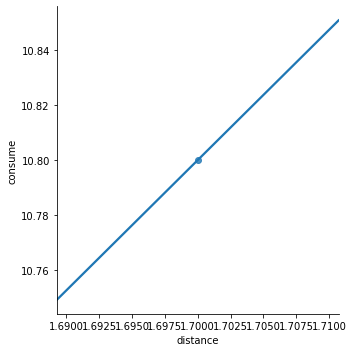

In [37]:
sns.lmplot('distance','consume',data=gas1mnd)
plt.show()

## Maximum distance travel by gas1

In [38]:
gas1mxd=gas1.query('distance==130.300000')
gas1mxd

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
189     130.3      4.6     85         22.0            12      E10   0     0   

     sun  
189    0

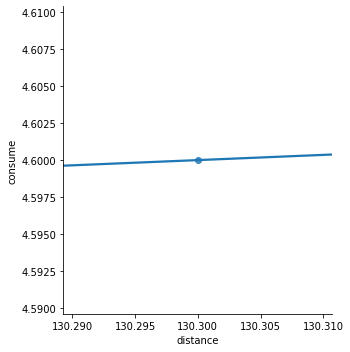

In [39]:
sns.lmplot('distance','consume',data=gas1mxd)
plt.show()

## gas1 consume by max speed

In [40]:
gas1mxs=gas1.query('speed==88.000000')
gas1mxs

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
273      93.9      4.8     88         23.0            18      E10   1     0   

     sun  
273    1

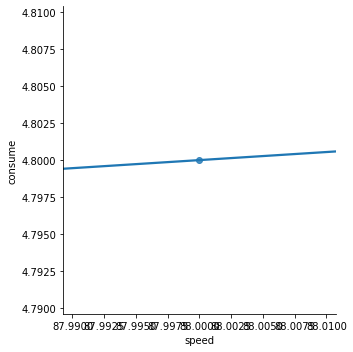

In [41]:
sns.lmplot('speed','consume',data=gas1mxs)
plt.show()

## gas1 consume by minimum speed

In [42]:
gas1mns=gas1.query('speed==14.000000')
gas1mns

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
147       1.7     10.8     14         21.5            10      E10   0     1   

     sun  
147    0

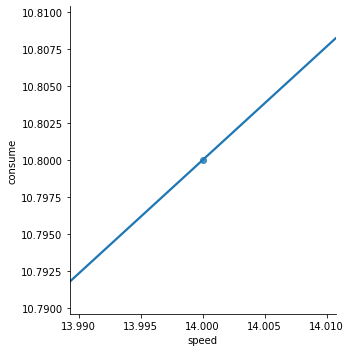

In [43]:
sns.lmplot('speed','consume',data=gas1mns)
plt.show()

In [44]:
gas2=cfl[cfl['gas_type']=='SP98']
gas2

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
44        5.4      3.3     32         21.5             7     SP98   0     0   
45        2.0      9.9     21         21.5             4     SP98   0     0   
46       14.2      5.1     32         21.5             7     SP98   0     0   
47       16.0      4.9     25         21.5             8     SP98   0     0   
48       11.8      4.9     25         21.5            11     SP98   0     0   
49       27.3      4.7     36         21.5            10     SP98   0     0   
50       11.8      5.1     29         21.5             5     SP98   0     1   
51       10.6      4.9     63         21.5             6     SP98   0     0   
52       11.6      4.2     61         21.5             7     SP98   0     0   
53       13.1      6.1     46         21.5             6     SP98   0     1   
54        6.1      6.4     28         21.5             8     SP98   0     0   
55      153.5      4.9     82         21.5             3     SP98   0     1   
56       11.8      4.9     24         21.5             7     SP98   0     0   
57       12.3      6.2     61         21.5             8     SP98   0     0   
58       12.4      4.2     57         21.5             8     SP98   0     0   
59       12.3      5.7     52         21.5             8     SP98   0     1   
60        2.9      7.9     18         21.5             9     SP98   1     1   
61        2.1     12.2     23         21.5             9     SP98   1     1   
62        9.8      5.8     24         21.5             6     SP98   0     0   
63        6.8      5.3     26         21.5             6     SP98   0     0   
64       12.4      5.4     24         21.5             7     SP98   0     0   
65       12.4      4.7     57         21.5             8     SP98   0     0   
66       11.8      4.6     41         21.5             6     SP98   0     0   
67       12.3      5.4     55         21.5             8     SP98   0     0   
68       14.0      4.3     40         21.5             8     SP98   0     0   
69       11.8      4.5     37         21.5             4     SP98   1     0   
70       12.3      5.2     55         21.5            12     SP98   0     0   
71        2.0      6.2     20         21.5            10     SP98   0     0   
72       13.9      5.1     29         21.5             6     SP98   0     0   
73        9.7      3.9     42         21.5             8     SP98   0     0   
..        ...      ...    ...          ...           ...      ...  ..   ...   
358       6.1      5.0     33         22.0            24     SP98   0     0   
359      17.3      4.2     36         22.0            22     SP98   0     0   
360       6.0      4.8     27         22.0            17     SP98   0     0   
361      16.0      4.1     45         22.0            15     SP98   0     0   
362      15.4      4.9     55         22.0            18     SP98   0     0   
363      15.4      4.3     39         22.0            23     SP98   0     0   
364      16.0      3.9     35         22.0            18     SP98   0     0   
365      15.4      4.5     52         22.0            26     SP98   0     0   
366      16.6      4.1     48         25.5            30     SP98   1     0   
367      15.4      5.0     48         25.5            31     SP98   1     0   
368      16.0      4.0     43         22.0            21     SP98   1     0   
369      15.4      4.5     42         22.0            30     SP98   0     0   
370      16.0      3.6     43         22.0            19     SP98   0     0   
371      20.9      4.1     33         22.0            21     SP98   0     0   
372      32.1      3.9     47         22.0            26     SP98   0     0   
373      15.3      6.6     16         24.0            27     SP98   1     0   
374      28.5      4.0     44         25.0            23     SP98   1     0   
375      11.9      3.7     33         25.0            19     SP98   0     0   
376      14.5      4.3     36         25.0            2

In [45]:
gas2.describe()

distance     consume       speed  temp_inside  temp_outside  \
count  228.000000  228.000000  228.000000   228.000000    228.000000   
mean    18.639912    4.899123   40.820175    21.703947     12.228070   
std     24.179598    1.118408   13.170122     1.652346      7.271373   
min      1.300000    3.300000   16.000000    16.000000     -3.000000   
25%     11.800000    4.200000   32.000000    21.500000      7.000000   
50%     14.150000    4.700000   39.500000    22.000000     11.000000   
75%     18.150000    5.225000   48.000000    22.000000     17.000000   
max    216.100000   12.200000   90.000000    25.500000     31.000000   

               AC        rain         sun  
count  228.000000  228.000000  228.000000  
mean     0.100877    0.140351    0.087719  
std      0.301829    0.348115    0.283509  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000

## Minimum distance cover by gas2

In [46]:
gas2mnd=gas2.query('distance==1.300000')
gas2mnd

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
210       1.3     11.5     21         20.0            10     SP98   0     0   

     sun  
210    0

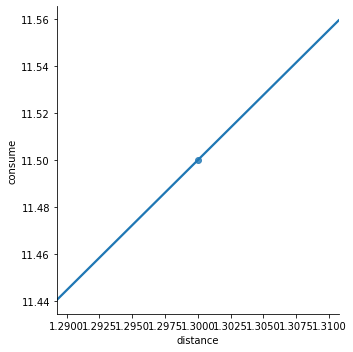

In [47]:
sns.lmplot('distance','consume',data=gas2mnd)
plt.show()

## Maximum distance cover by gas2

In [48]:
gas2mxd=gas2.query('distance==216.100000')
gas2mxd

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
319     216.1      5.3     90         22.0            21     SP98   0     0   

     sun  
319    1

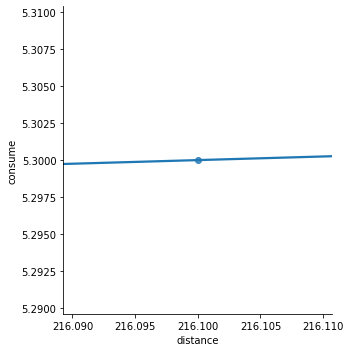

In [49]:
sns.lmplot('distance','consume',data=gas2mxd)
plt.show()

## gas2 consume by maximum speed

In [50]:
gas2mxs=gas2.query('speed==90.000000')
gas2mxs

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
319     216.1      5.3     90         22.0            21     SP98   0     0   

     sun  
319    1

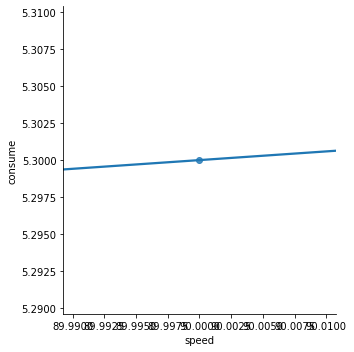

In [51]:
sns.lmplot('speed','consume',data=gas2mxs)
plt.show()

## gas2 consume by minimum speed

In [52]:
gas2mns=gas2.query('speed==16.000000')
gas2mns

distance  consume  speed  temp_inside  temp_outside gas_type  AC  rain  \
373      15.3      6.6     16         24.0            27     SP98   1     0   

     sun  
373    0

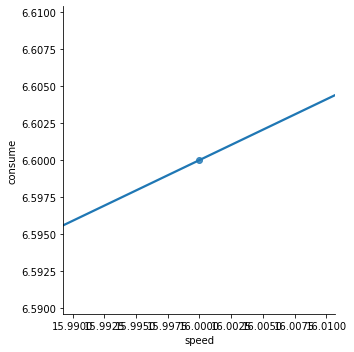

In [53]:
sns.lmplot('speed','consume',data=gas2mns)
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cfl['gas_type']=le.fit_transform(cfl['gas_type'])


In [55]:
cfl['distance']=cfl['distance'].astype(int)
cfl['consume']=cfl['consume'].astype(int)
cfl['temp_inside']=cfl['temp_inside'].astype(int)

## Decision-making


In [56]:
x=cfl.drop(['consume','AC'],axis=1)

y=cfl['consume']

x

distance  speed  temp_inside  temp_outside  gas_type  rain  sun
0          28     26           21            12         0     0    0
1          12     30           21            13         0     0    0
2          11     38           21            15         0     0    0
3          12     36           21            14         0     0    0
4          18     46           21            15         0     0    0
5           8     50           21            10         0     0    0
6           7     43           21            11         0     0    0
7          12     40           21             6         0     0    0
8           4     26           21             4         0     0    0
9          11     30           21             9         0     0    0
10         12     42           21             4         0     0    0
11         11     38           21             0         0     0    0
12         12     59           21            10         0     0    0
13         24     58           21            12         0     0    0
14         12     46           21            11         0     0    0
15         17     24           21             5         0     0    0
16         33     36           21             3         0     0    0
17         11     32           21             3         0     0    0
18         25     39           21             8         0     0    0
19         11     40           21             4         0     0    0
20         25     32           21             3         0     0    0
21         14     38           21             1         0     0    0
22         17     37           21             1         0     0    0
23         11     36           21             1         0     0    0
24         12     62           21             6         0     0    0
25         12     57           21             9         0     0    0
26         18     21           22             2         0     0    0
27         18     28           21             3         0     0    0
28         18     29           21             1         0     0    0
29         18     35           21             4         0     0    0
..        ...    ...          ...           ...       ...   ...  ...
358         6     33           22            24         1     0    1
359        17     36           22            22         1     0    0
360         6     27           22            17         1     0    0
361        16     45           22            15         1     0    0
362        15     55           22            18         1     0    0
363        15     39           22            23         1     0    0
364        16     35           22            18         1     0    0
365        15     52           22            26         1     0    0
366        16     48           25            30         1     0    1
367        15     48           25            31         1     0    0
368        16     43           22            21         1     0    0
369        15     42           22            30         1     0    0
370        16     43           22            19         1     0    0
371        20     33           22            21         1     0    0
372        32     47           22            26         1     0    0
373        15     16           24            27         1     0    0
374        28     44           25            23         1     0    0
375        11     33           25            19         1     0    0
376        14     36           25            22         1     0    0
377        16     49           22            26         1     0    1
378        16     39           24            17         1     0    0
379        16     44           24            23         1     0    1
380         8     52           24            27         1     0    0
381         5     33           24            28         1     0    1
382        13     33           24            28         1     0    1
383        16     39           24            18         1     0    0
384

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.40,random_state=43)

In [58]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trainst=ss.fit_transform(x_train)
x_testst=ss.transform(x_test)

In [59]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_trainmn=mms.fit_transform(x_train)
x_testmn= mms.transform(x_test)

In [60]:
from sklearn.decomposition import PCA
pc=PCA(n_components=4)
x_trainpca=pc.fit_transform(x_train)
x_testpca=pc.transform(x_test)

In [61]:
from sklearn.tree import DecisionTreeRegressor
dt1=DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=3,random_state=72)
dt1.fit(x_train,y_train)
py1=dt1.predict(x_test)


In [62]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, py1)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, py1))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, py1))


Root Mean Squared Error(RMSE): 0.8571884459487324
Mean Absolute Error(MAE): 0.6389798145117295
Mean Squared Error(MSE): 0.734772031868003


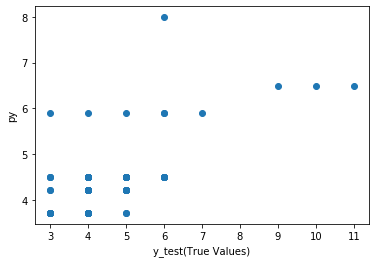

In [63]:
plt.scatter(y_test,py1)
plt.xlabel('y_test(True Values)')
plt.ylabel('py')
plt.show()

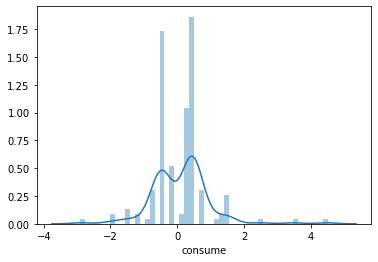

In [64]:
sns.distplot((y_test-py1),bins=50)
plt.show()

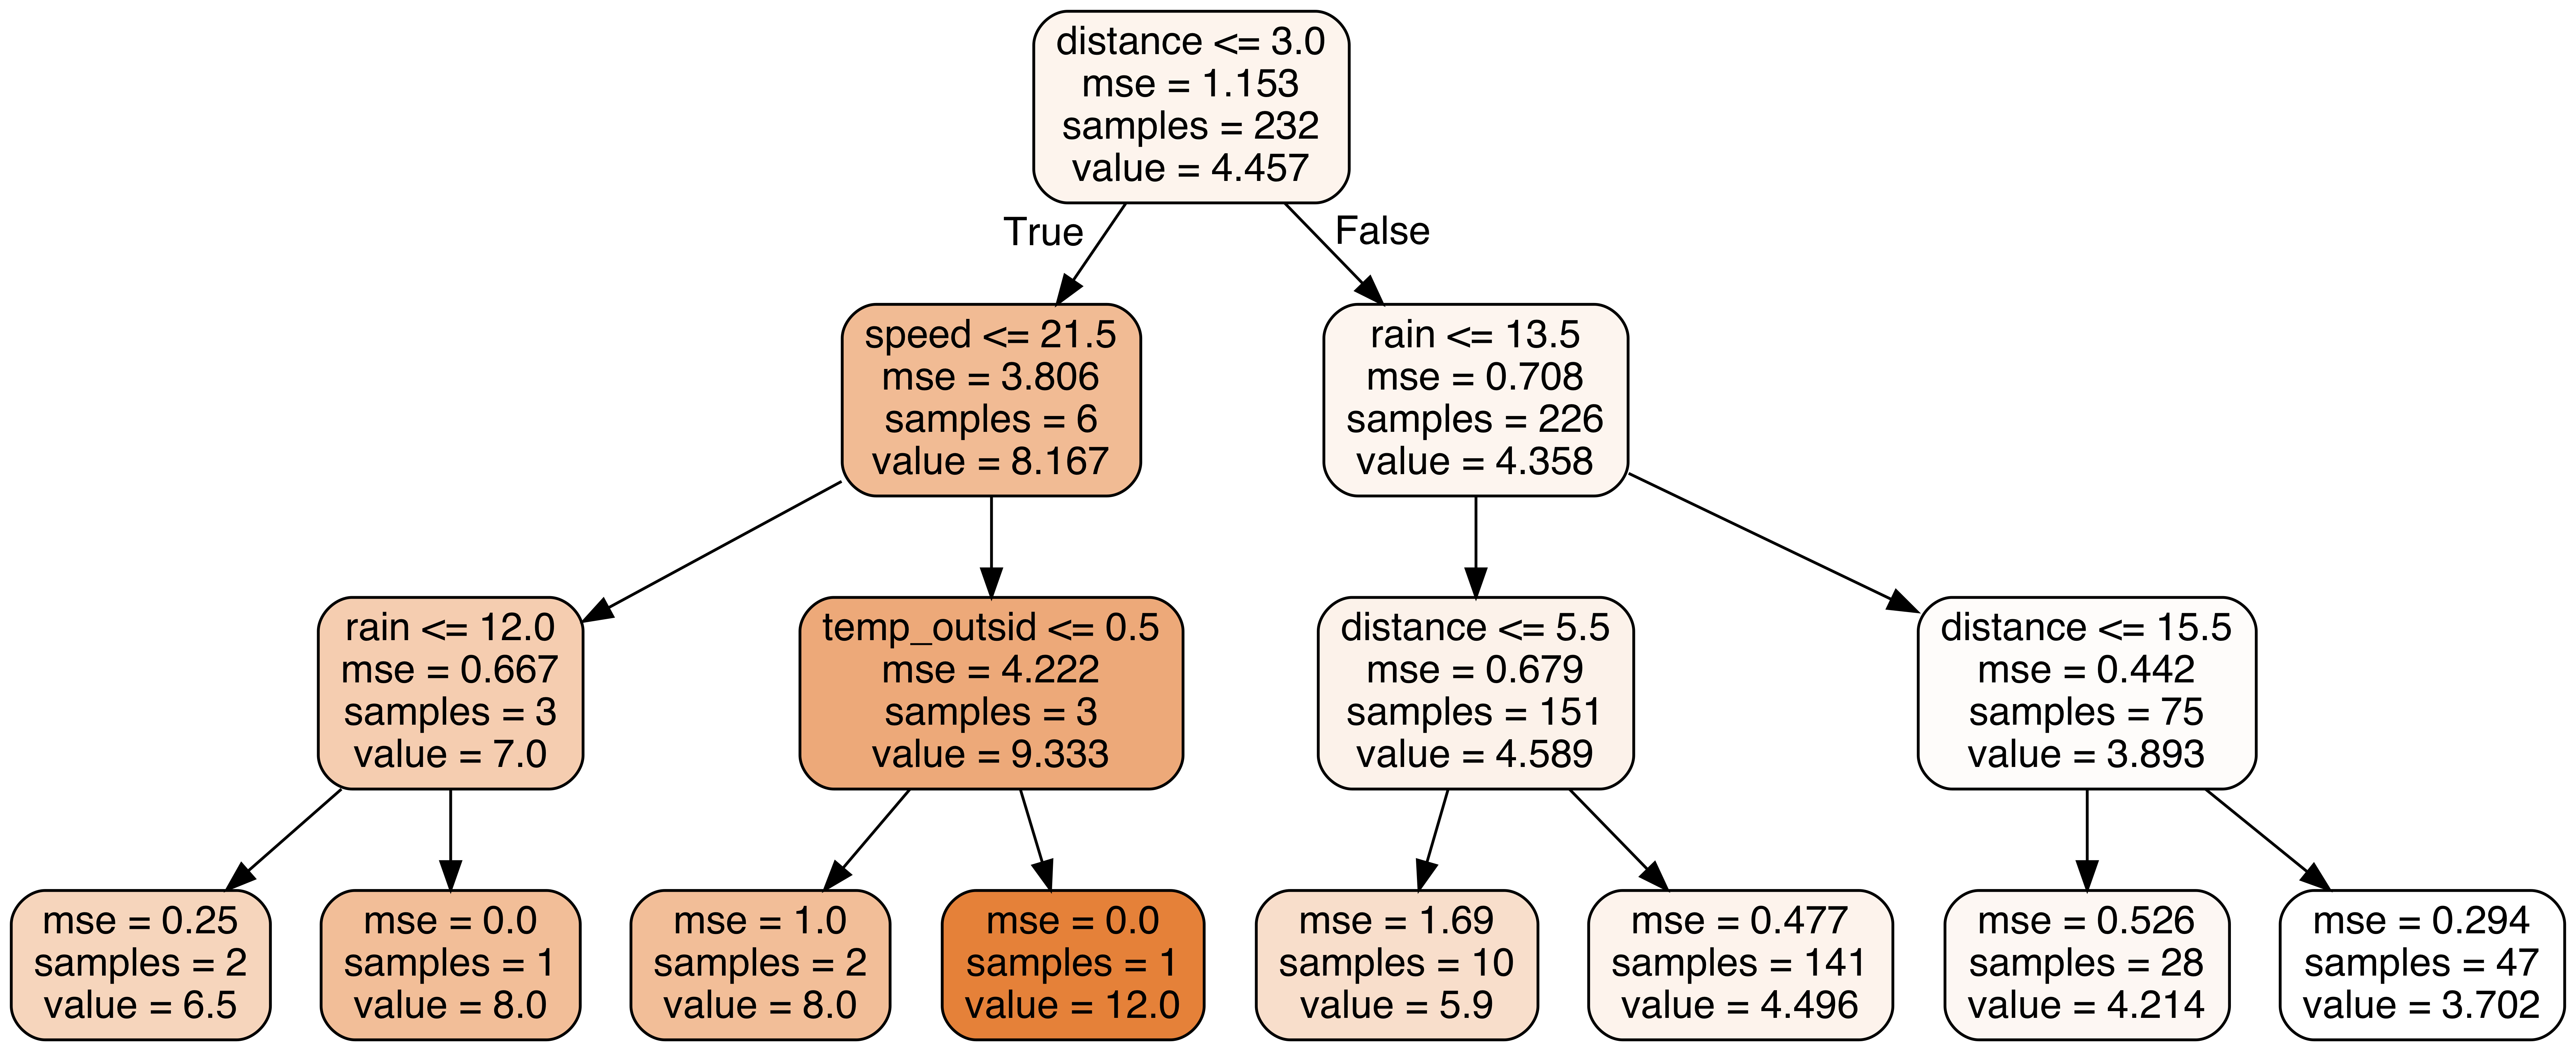

In [65]:
ftr=['distance','speed','gas_type','rain','temp_inside','temp_outsid','sun']

from sklearn.tree import export_graphviz
export_graphviz(dt1,out_file="tree.dot",feature_names=ftr,rounded=True,filled=True)
from subprocess import call
call(['dot','-Tpng','tree.dot','-o','tree1.png','-Gdpi=600'])

from IPython.display import Image
Image(filename='tree1.png')

In [66]:
from sklearn.tree import DecisionTreeRegressor
dt2=DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=3,random_state=72)
dt2.fit(x_trainst,y_train)
py2=dt2.predict(x_testst)


In [67]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, py2)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, py2))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, py2))


Root Mean Squared Error(RMSE): 0.8571884459487324
Mean Absolute Error(MAE): 0.6389798145117295
Mean Squared Error(MSE): 0.734772031868003


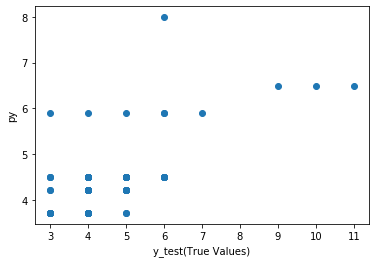

In [68]:
plt.scatter(y_test,py2)
plt.xlabel('y_test(True Values)')
plt.ylabel('py')
plt.show()

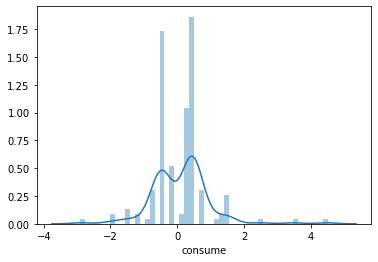

In [69]:
sns.distplot((y_test-py2),bins=50)
plt.show()

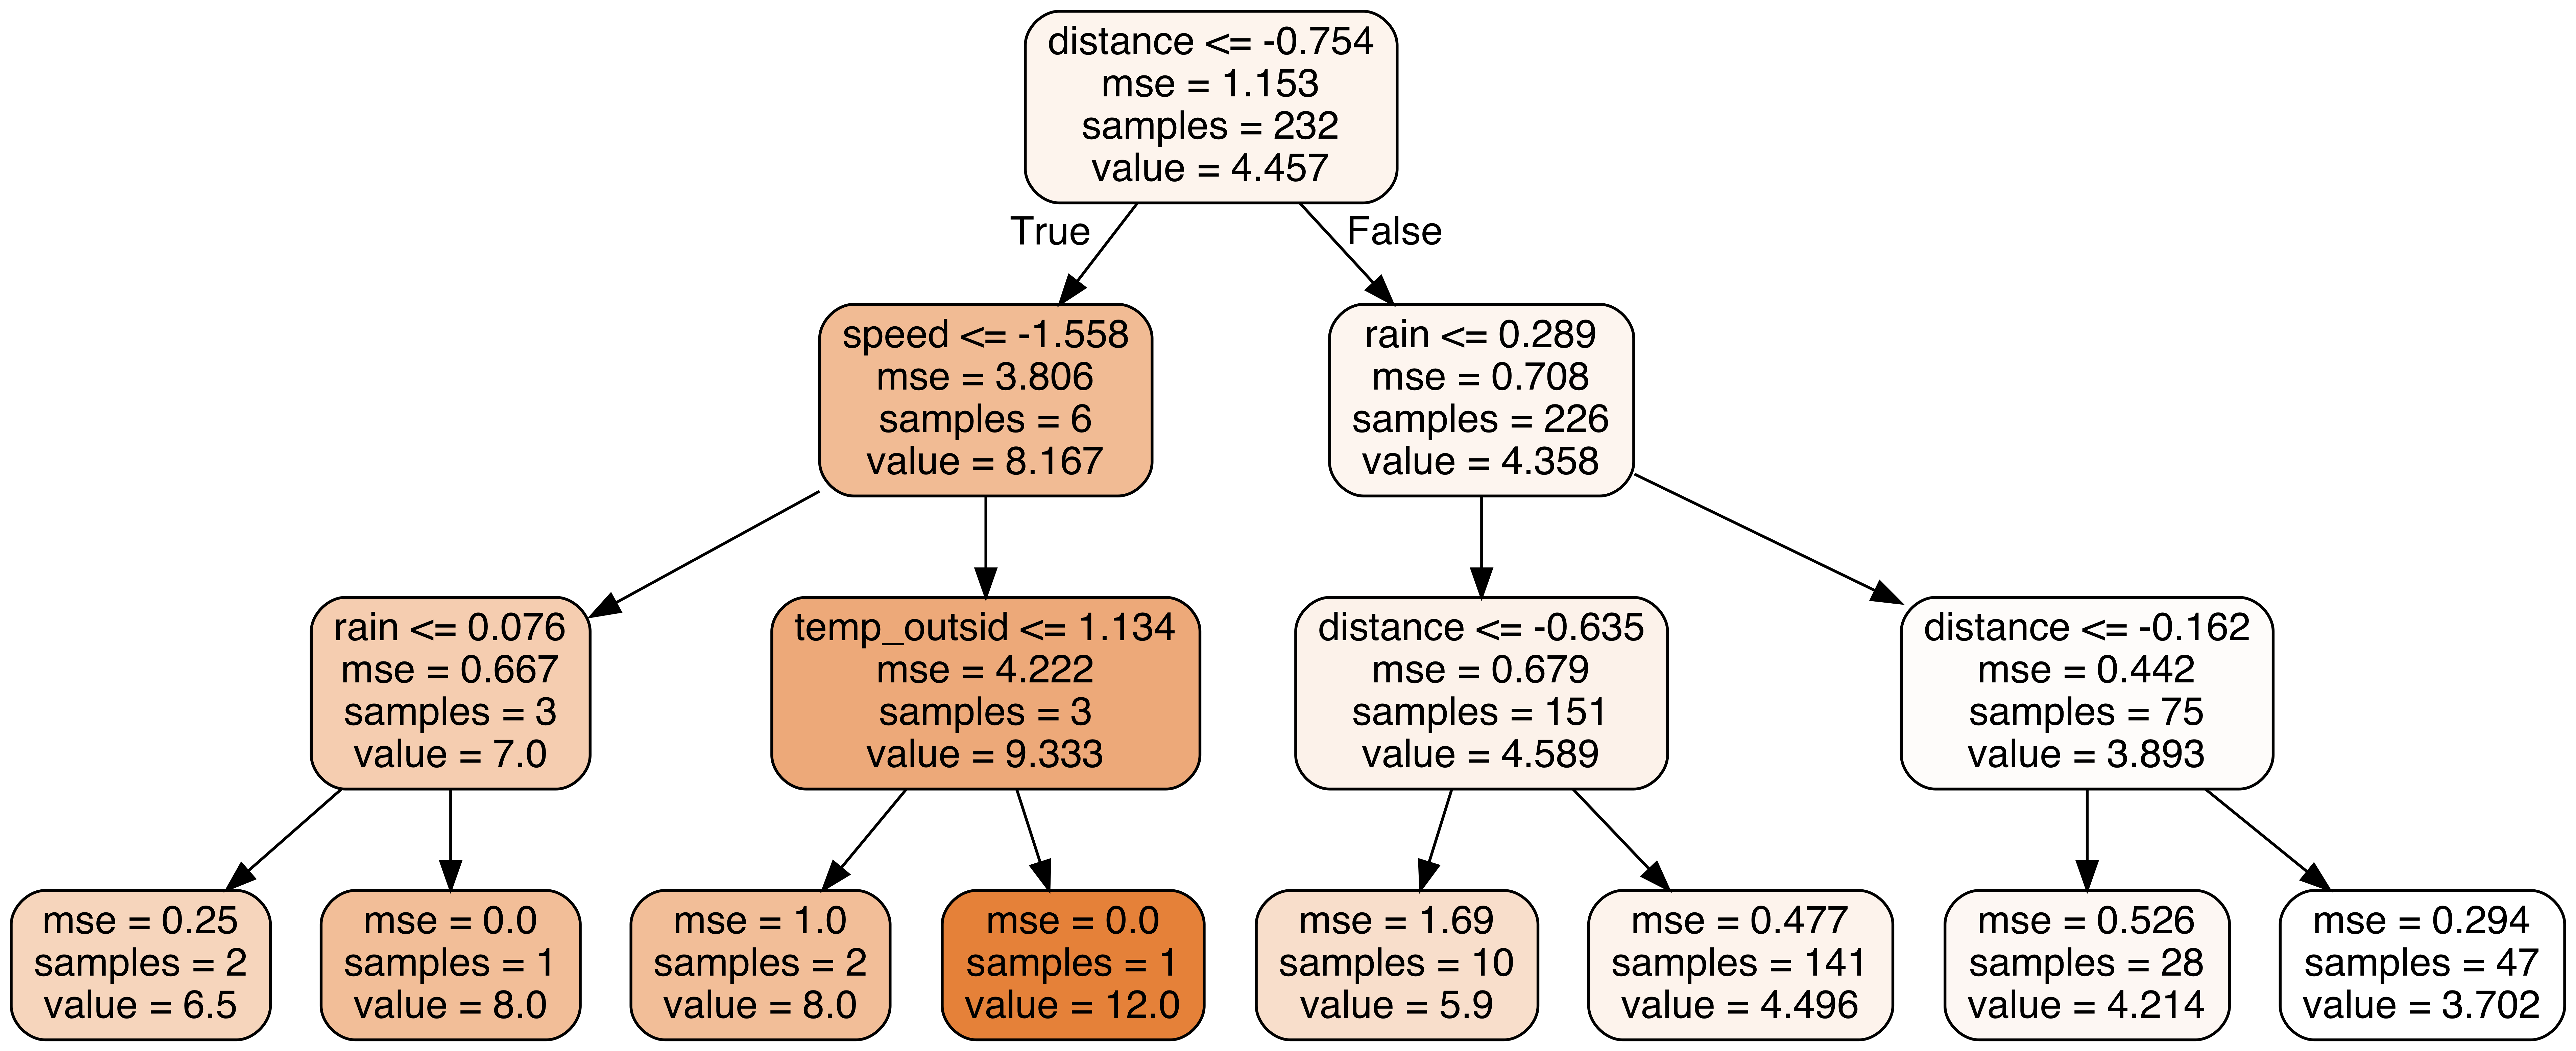

In [70]:
ftr=['distance','speed','gas_type','rain','temp_inside','temp_outsid','sun']

from sklearn.tree import export_graphviz
export_graphviz(dt2,out_file="tree.dot",feature_names=ftr,rounded=True,filled=True)
from subprocess import call
call(['dot','-Tpng','tree.dot','-o','tree2.png','-Gdpi=600'])

from IPython.display import Image
Image(filename='tree2.png')

In [71]:
from sklearn.tree import DecisionTreeRegressor
dt3=DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=3,random_state=72)
dt3.fit(x_trainmn,y_train)
py3=dt3.predict(x_testmn)


In [72]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, py3)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, py3))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, py3))


Root Mean Squared Error(RMSE): 0.8571884459487324
Mean Absolute Error(MAE): 0.6389798145117295
Mean Squared Error(MSE): 0.734772031868003


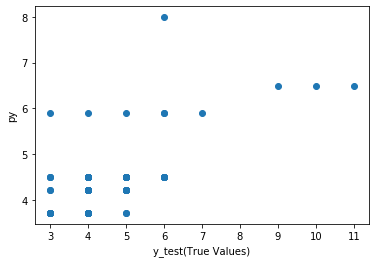

In [73]:
plt.scatter(y_test,py3)
plt.xlabel('y_test(True Values)')
plt.ylabel('py')
plt.show()

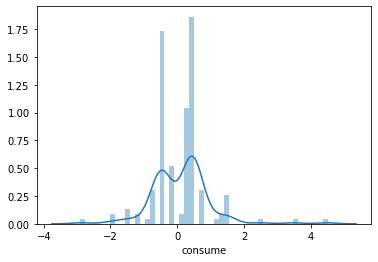

In [74]:
sns.distplot((y_test-py3),bins=50)
plt.show()

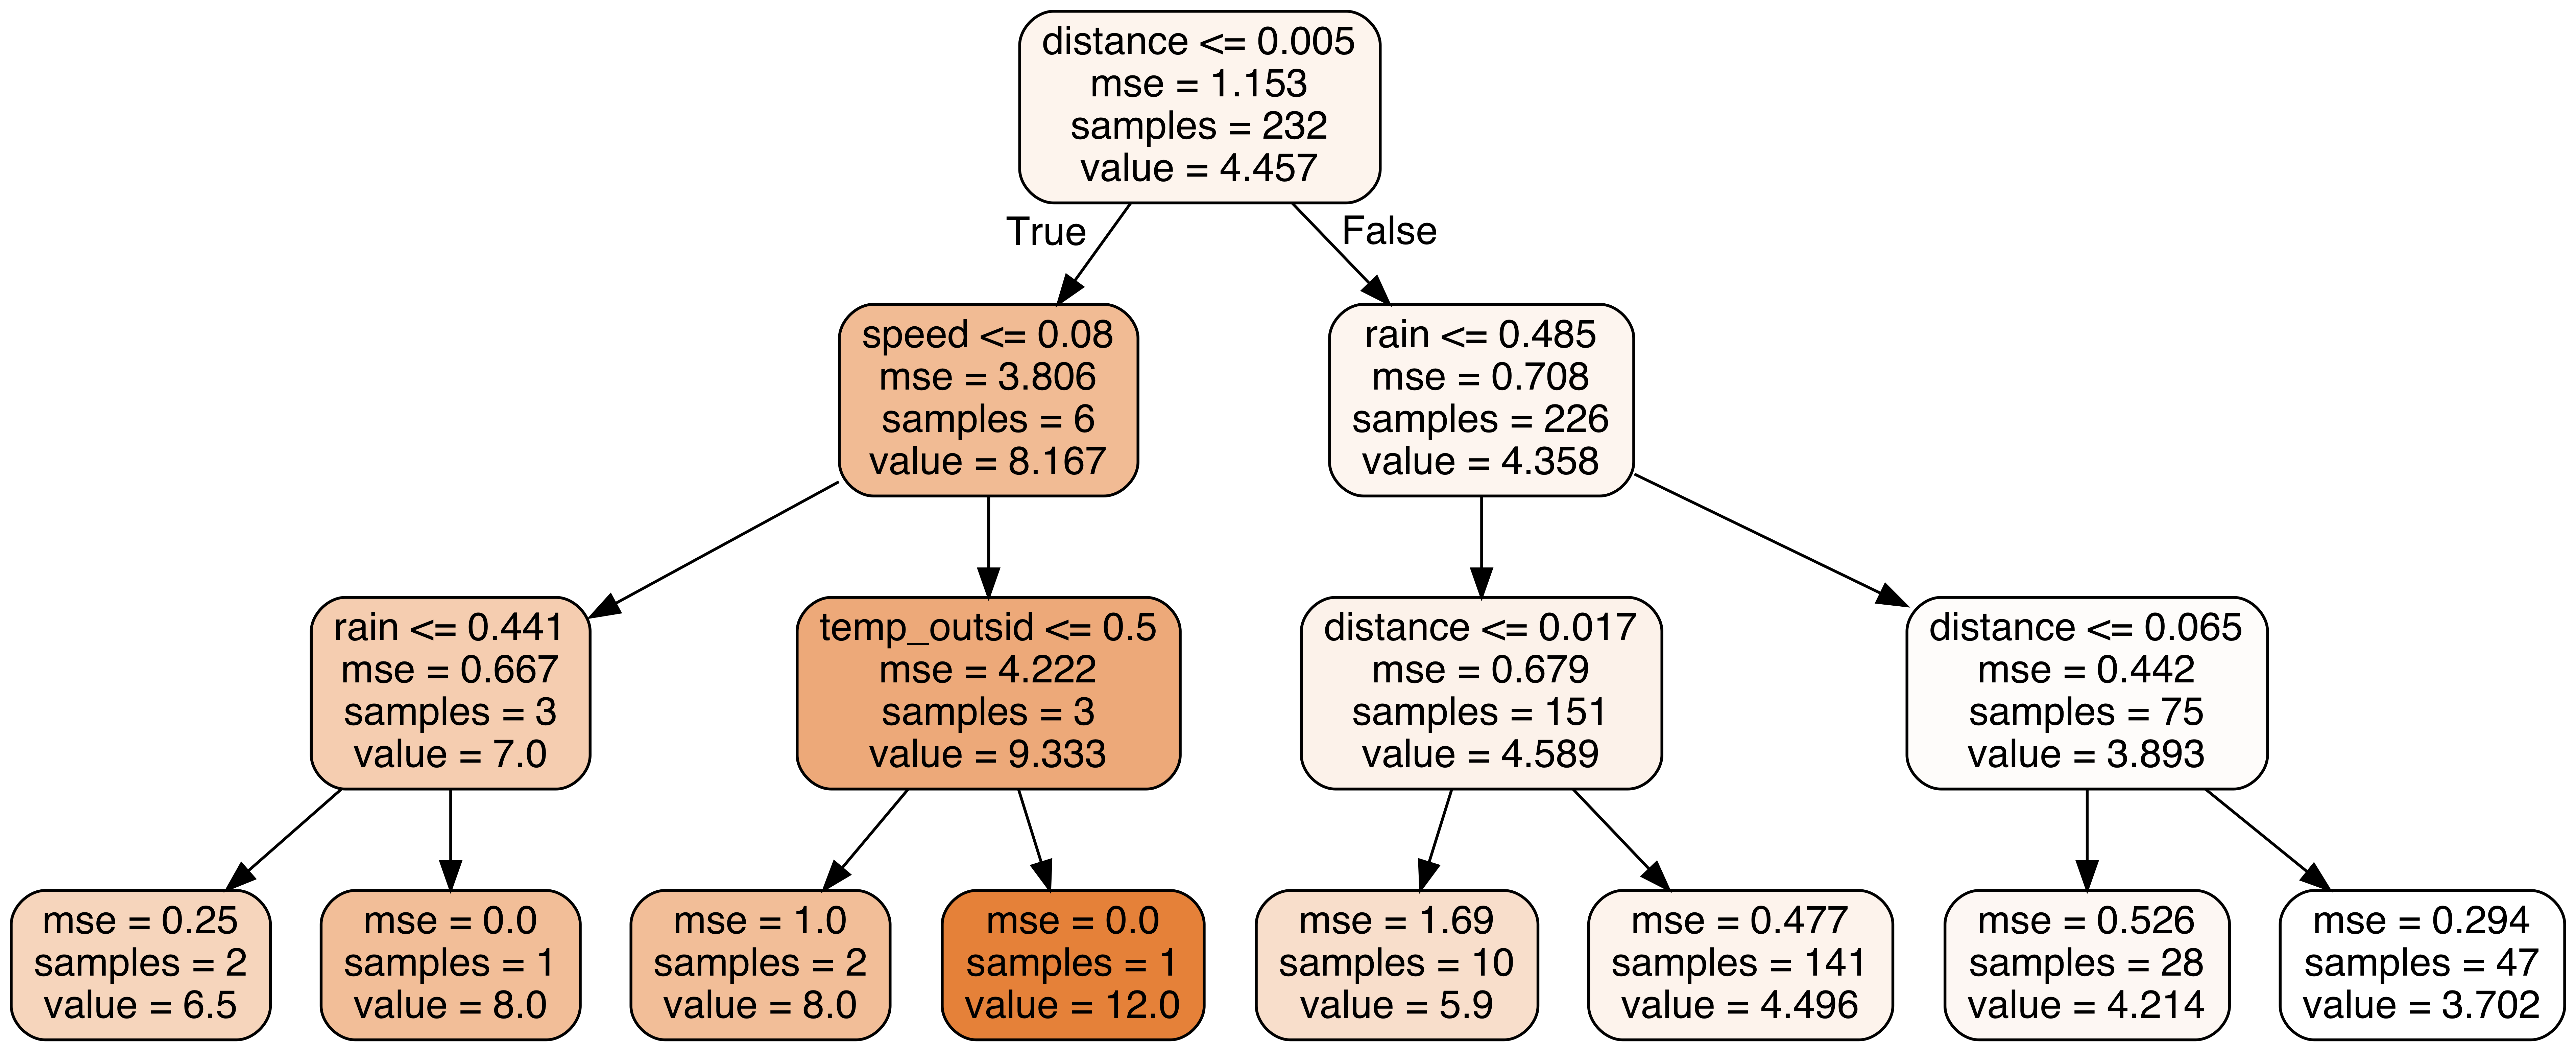

In [75]:
ftr=['distance','speed','gas_type','rain','temp_inside','temp_outsid','sun']

from sklearn.tree import export_graphviz
export_graphviz(dt3,out_file="tree.dot",feature_names=ftr,rounded=True,filled=True)
from subprocess import call
call(['dot','-Tpng','tree.dot','-o','tree3.png','-Gdpi=600'])

from IPython.display import Image
Image(filename='tree3.png')

In [76]:
from sklearn.tree import DecisionTreeRegressor
dt4=DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=3,random_state=72)
dt4.fit(x_trainpca,y_train)
py4=dt4.predict(x_testpca)


In [77]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, py4)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, py4))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, py4))


Root Mean Squared Error(RMSE): 0.8409735986312175
Mean Absolute Error(MAE): 0.6164908323593556
Mean Squared Error(MSE): 0.70723659359474


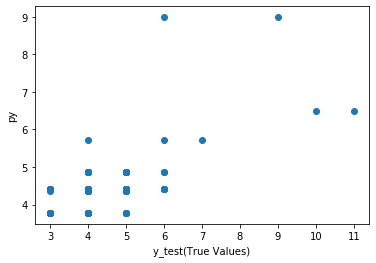

In [78]:
plt.scatter(y_test,py4)
plt.xlabel('y_test(True Values)')
plt.ylabel('py')
plt.show()

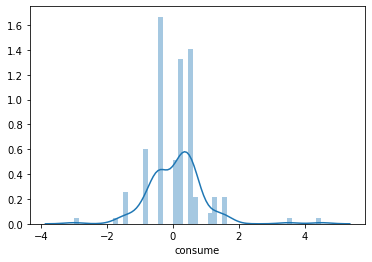

In [79]:
sns.distplot((y_test-py4),bins=50)
plt.show()

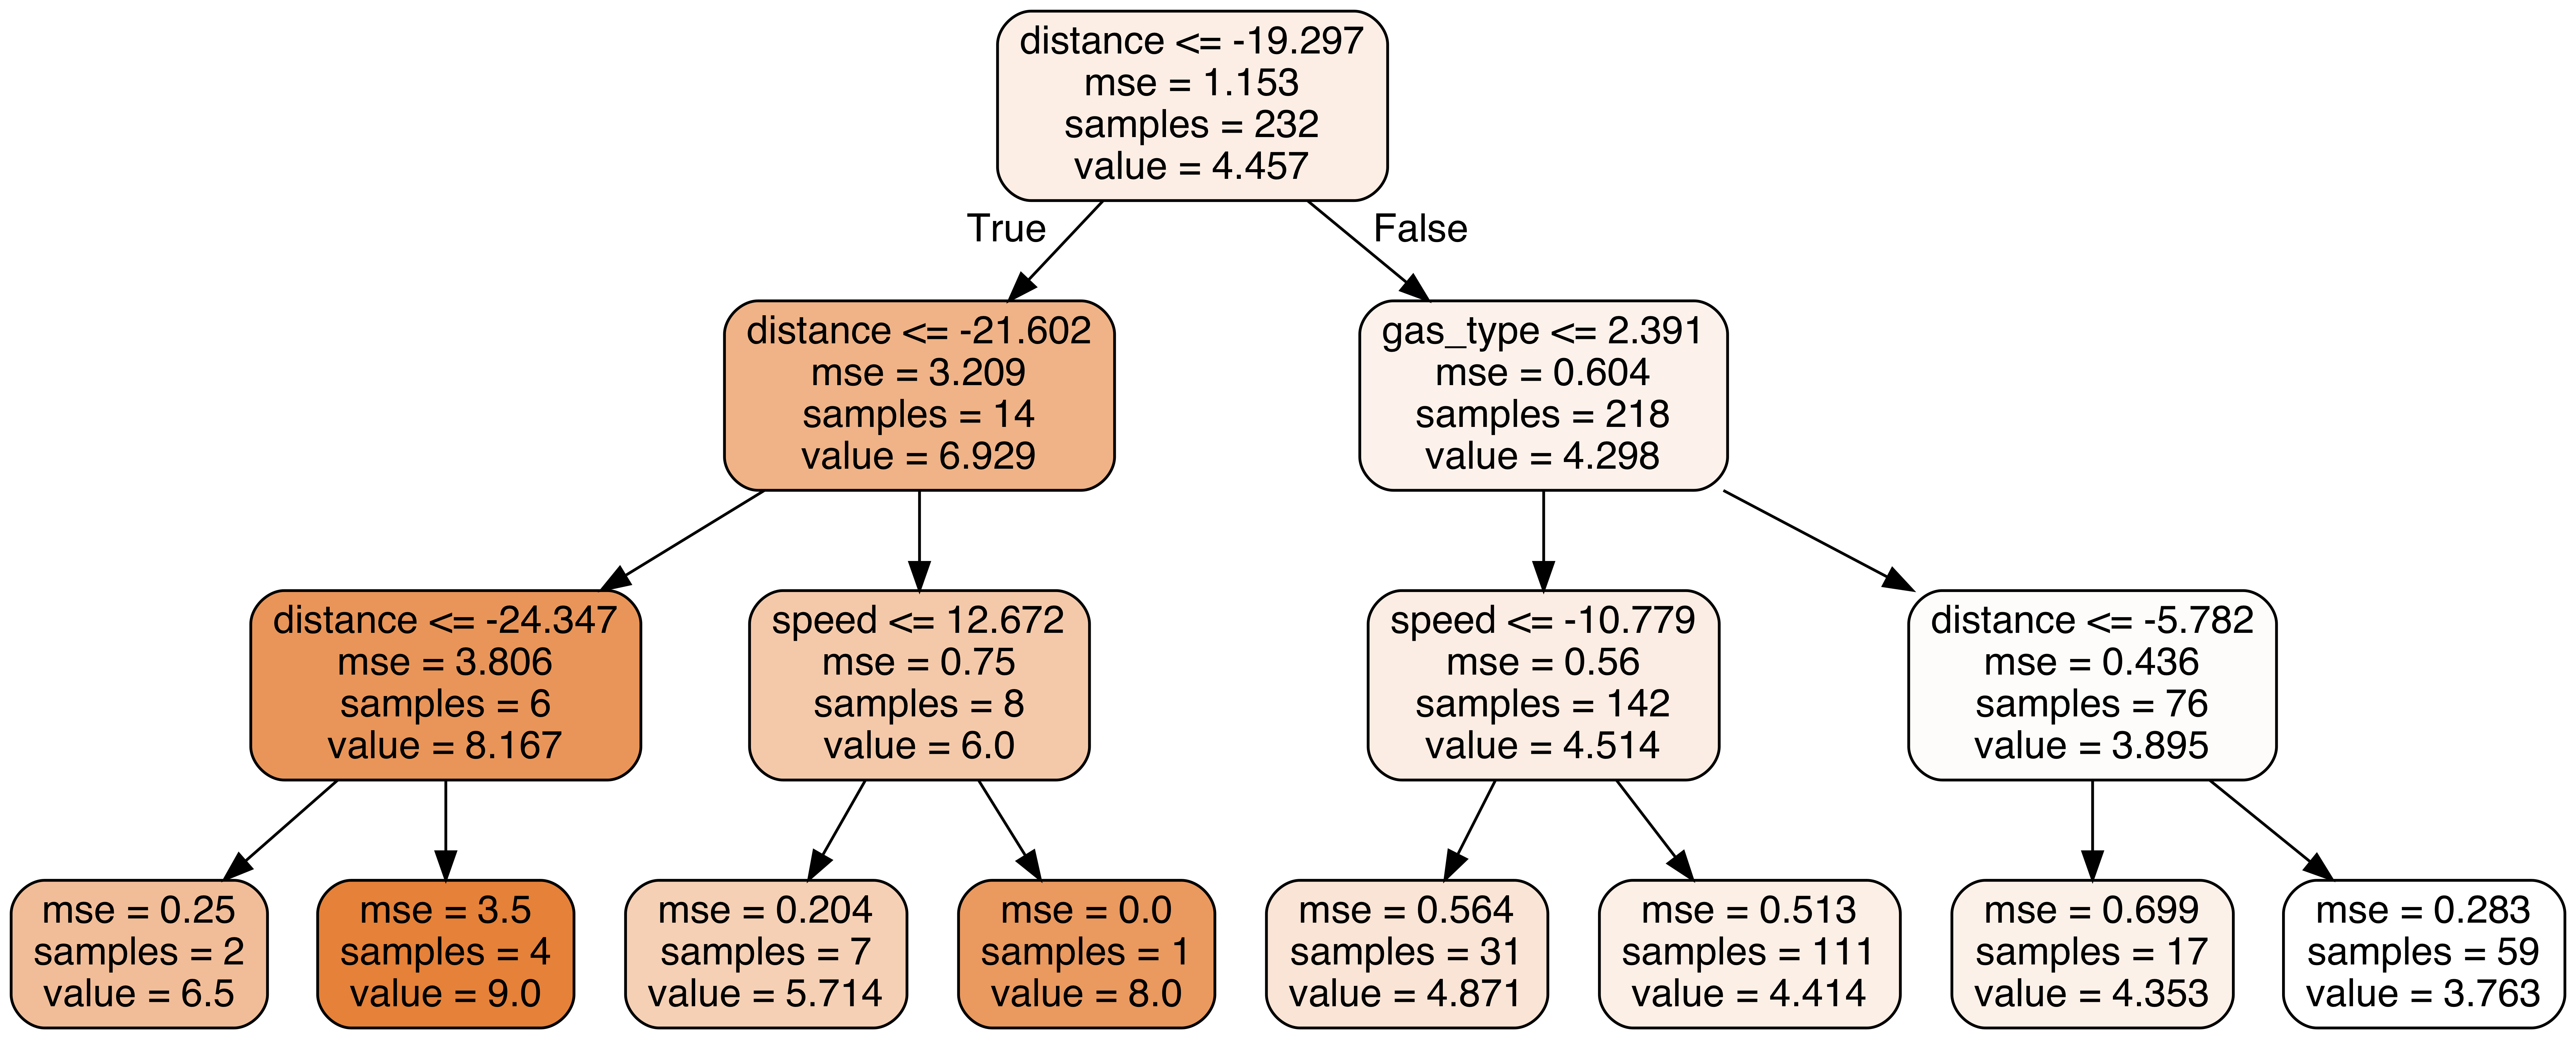

In [80]:
ftrpc=['distance','speed','gas_type','rain']

from sklearn.tree import export_graphviz
export_graphviz(dt4,out_file="tree.dot",feature_names=ftrpc,rounded=True,filled=True)
from subprocess import call
call(['dot','-Tpng','tree.dot','-o','tree4.png','-Gdpi=600'])

from IPython.display import Image
Image(filename='tree4.png')

In [81]:
from sklearn.ensemble import RandomForestRegressor
md5=RandomForestRegressor(n_estimators='warn',criterion='mse', random_state=44, max_depth=3)
md5.fit(x_train,y_train)
py5=md5.predict(x_test)


/Users/rahulbadhan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [82]:
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, py5)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, py5))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, py5))

Root Mean Squared Error(RMSE): 0.7171340535632609
Mean Absolute Error(MAE): 0.5586149545347499
Mean Squared Error(MSE): 0.5142812507800739


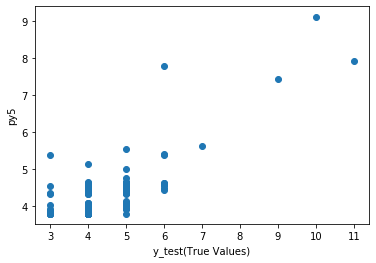

In [83]:
plt.scatter(y_test,py5)
plt.xlabel('y_test(True Values)')
plt.ylabel('py5')
plt.show()

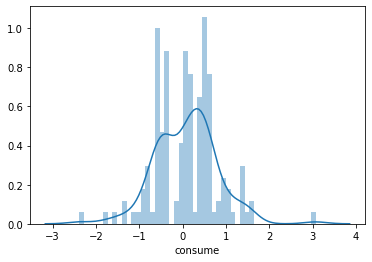

In [84]:
sns.distplot((y_test-py5),bins=50)
plt.show()

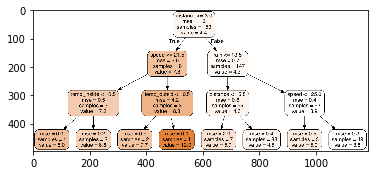

In [85]:
tree = md5.estimators_[5]
from sklearn.tree import export_graphviz
import pydot
export_graphviz(tree, out_file = 'tree.dot', feature_names = ftr, rounded = True, precision = 1,filled=True)
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree5.png')
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('tree5.png'))
plt.show()

In [86]:
from sklearn.ensemble import RandomForestRegressor
md6=RandomForestRegressor(n_estimators='warn',criterion='mse', random_state=44, max_depth=3)
md6.fit(x_trainst,y_train)
py6=md6.predict(x_testst)

print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, py6)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, py6))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, py6))

Root Mean Squared Error(RMSE): 0.7192213305675335
Mean Absolute Error(MAE): 0.5601634060832013
Mean Squared Error(MSE): 0.5172793223433333


/Users/rahulbadhan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



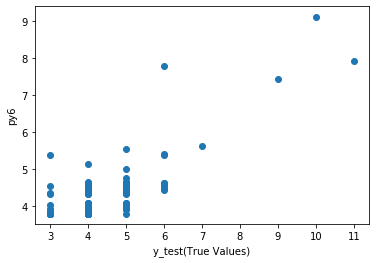

In [87]:
plt.scatter(y_test,py6)
plt.xlabel('y_test(True Values)')
plt.ylabel('py6')
plt.show()


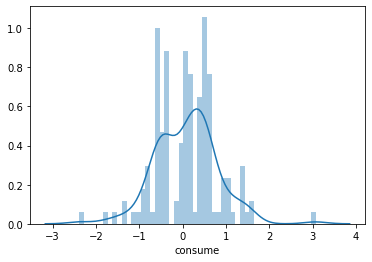

In [88]:
sns.distplot((y_test-py6),bins=50)
plt.show()

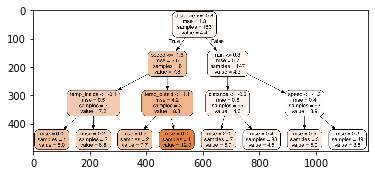

In [89]:
tree = md6.estimators_[5]
from sklearn.tree import export_graphviz
import pydot
export_graphviz(tree, out_file = 'tree.dot', feature_names = ftr, rounded = True, precision = 1,filled=True)
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree6.png')
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('tree6.png'))
plt.show()

In [90]:
from sklearn.ensemble import RandomForestRegressor
md7=RandomForestRegressor(n_estimators='warn',criterion='mse', random_state=44, max_depth=3)
md7.fit(x_trainmn,y_train)
py7=md7.predict(x_testmn)

print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, py7)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, py7))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, py7))

Root Mean Squared Error(RMSE): 0.711576969817535
Mean Absolute Error(MAE): 0.5556679015876969
Mean Squared Error(MSE): 0.5063417839747052


/Users/rahulbadhan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



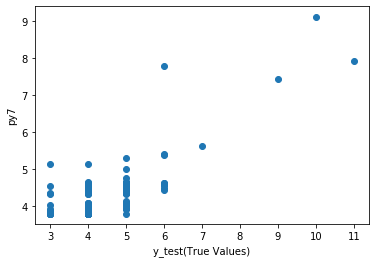

In [91]:
plt.scatter(y_test,py7)
plt.xlabel('y_test(True Values)')
plt.ylabel('py7')
plt.show()


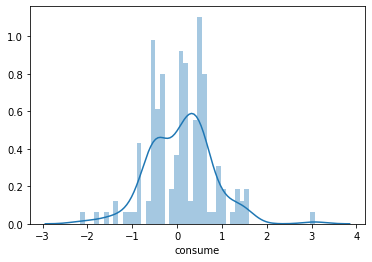

In [92]:
sns.distplot((y_test-py7),bins=50)
plt.show()

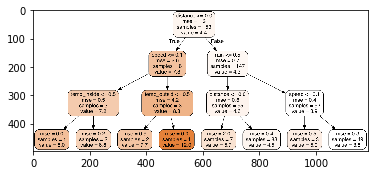

In [93]:
tree = md7.estimators_[5]
from sklearn.tree import export_graphviz
import pydot
export_graphviz(tree, out_file = 'tree.dot', feature_names = ftr, rounded = True, precision = 1,filled=True)
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree7.png')
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('tree7.png'))
plt.show()

In [94]:
from sklearn.ensemble import RandomForestRegressor
md8=RandomForestRegressor(n_estimators='warn',criterion='mse', random_state=44, max_depth=3)
md8.fit(x_trainpca,y_train)
py8=md8.predict(x_testpca)

print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, py8)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, py8))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, py8))

Root Mean Squared Error(RMSE): 0.7804291674934871
Mean Absolute Error(MAE): 0.5886105084286678
Mean Squared Error(MSE): 0.6090696854745773


/Users/rahulbadhan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



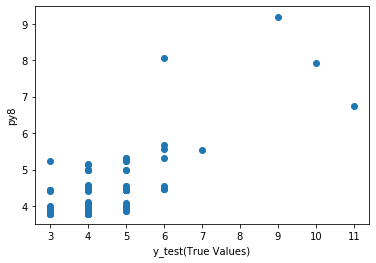

In [95]:
plt.scatter(y_test,py8)
plt.xlabel('y_test(True Values)')
plt.ylabel('py8')
plt.show()


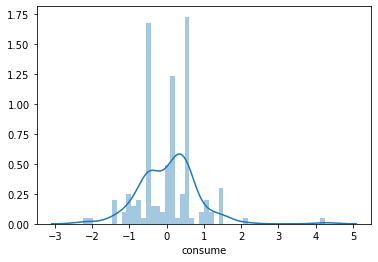

In [96]:
sns.distplot((y_test-py8),bins=50)
plt.show()

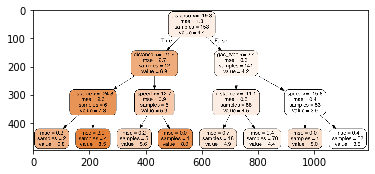

In [97]:
tree = md8.estimators_[5]
from sklearn.tree import export_graphviz
import pydot
export_graphviz(tree, out_file = 'tree.dot', feature_names = ftrpc, rounded = True, precision = 1,filled=True)
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree8.png')
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('tree8.png'))
plt.show()

In [98]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
lnr.fit(x_train,y_train)
py9=lnr.predict(x_test)


In [99]:
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, py9)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, py9))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, py9))

Root Mean Squared Error(RMSE): 0.9819739990986672
Mean Absolute Error(MAE): 0.6444494856455446
Mean Squared Error(MSE): 0.9642729349058293


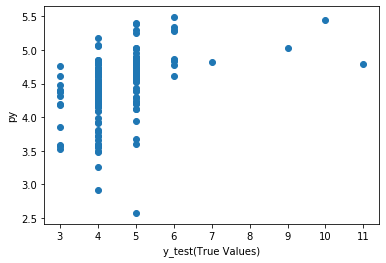

In [100]:
plt.scatter(y_test,py9)
plt.xlabel('y_test(True Values)')
plt.ylabel('py')
plt.show()

In [101]:
print('Variation Score:',metrics.explained_variance_score(y_test,py9))

Variation Score: 0.17055845817583315


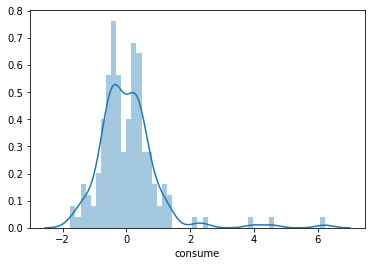

In [102]:
sns.distplot((y_test-py9),bins=50)
plt.show()

In [103]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
lnr.fit(x_trainst,y_train)
py10=lnr.predict(x_testst)
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, py10)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, py10))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, py10))

Root Mean Squared Error(RMSE): 0.9819739990986673
Mean Absolute Error(MAE): 0.6444494856455446
Mean Squared Error(MSE): 0.9642729349058294


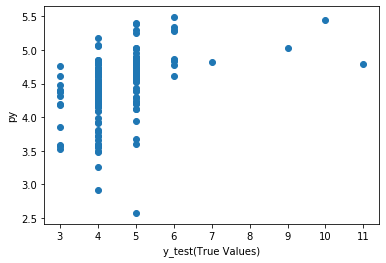

In [104]:
plt.scatter(y_test,py10)
plt.xlabel('y_test(True Values)')
plt.ylabel('py')
plt.show()

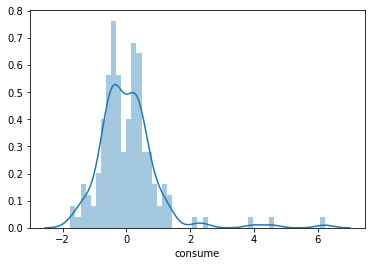

In [105]:
sns.distplot((y_test-py10),bins=50)
plt.show()

In [106]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
lnr.fit(x_trainmn,y_train)
py11=lnr.predict(x_testmn)
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, py11)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, py11))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, py11))

Root Mean Squared Error(RMSE): 0.9819739990986673
Mean Absolute Error(MAE): 0.6444494856455446
Mean Squared Error(MSE): 0.9642729349058294


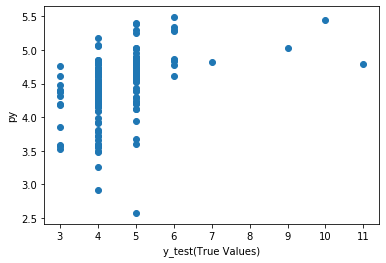

In [107]:
plt.scatter(y_test,py10)
plt.xlabel('y_test(True Values)')
plt.ylabel('py')
plt.show()

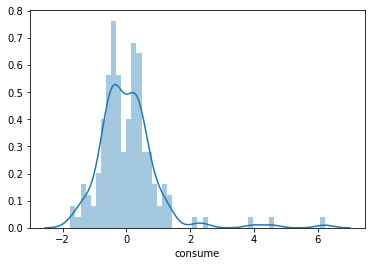

In [108]:
sns.distplot((y_test-py10),bins=50)
plt.show()

In [109]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
lnr.fit(x_trainpca,y_train)
py12=lnr.predict(x_testpca)
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, py12)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, py12))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, py12))

Root Mean Squared Error(RMSE): 0.9959389061919098
Mean Absolute Error(MAE): 0.6330855951539149
Mean Squared Error(MSE): 0.9918943048667378


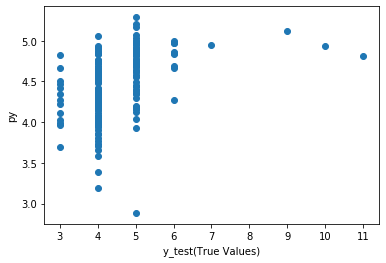

In [110]:
plt.scatter(y_test,py12)
plt.xlabel('y_test(True Values)')
plt.ylabel('py')
plt.show()

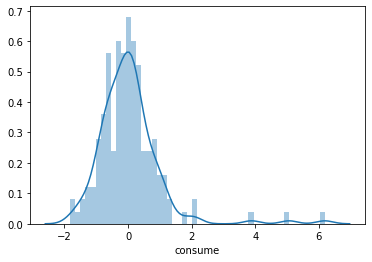

In [111]:
sns.distplot((y_test-py12),bins=50)
plt.show()